# Missing data imputation

In [25]:
import pandas as pd
import numpy as np


h_weather = pd.read_csv('data/historical_weather.csv')

In [26]:
h_weather['datetime'] = pd.to_datetime(h_weather['datetime'])

In [27]:
print(h_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   datetime                datetime64[ns]
 1   temperature             float64       
 2   dewpoint                float64       
 3   rain                    float64       
 4   snowfall                float64       
 5   surface_pressure        float64       
 6   cloudcover_total        int64         
 7   cloudcover_low          int64         
 8   cloudcover_mid          int64         
 9   cloudcover_high         int64         
 10  windspeed_10m           float64       
 11  winddirection_10m       int64         
 12  shortwave_radiation     float64       
 13  direct_solar_radiation  float64       
 14  diffuse_radiation       float64       
 15  latitude                float64       
 16  longitude               float64       
 17  data_block_id           float64       
dtypes:

In [28]:
print(h_weather.describe())

        temperature      dewpoint          rain      snowfall  \
count  1.710802e+06  1.710802e+06  1.710802e+06  1.710802e+06   
mean   5.740968e+00  2.240312e+00  4.962012e-02  1.604896e-02   
std    8.025647e+00  7.224357e+00  2.079113e-01  7.462936e-02   
min   -2.370000e+01 -2.590000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00 -2.600000e+00  0.000000e+00  0.000000e+00   
50%    5.100000e+00  1.700000e+00  0.000000e+00  0.000000e+00   
75%    1.120000e+01  7.200000e+00  0.000000e+00  0.000000e+00   
max    3.260000e+01  2.380000e+01  1.680000e+01  2.660000e+00   

       surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
count      1.710802e+06      1.710802e+06    1.710802e+06    1.710802e+06   
mean       1.009282e+03      6.091270e+01    4.668593e+01    3.440698e+01   
std        1.308891e+01      3.776905e+01    4.074760e+01    3.832769e+01   
min        9.429000e+02      0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.001500e+03      

In [29]:
print(h_weather.isnull().sum())

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64


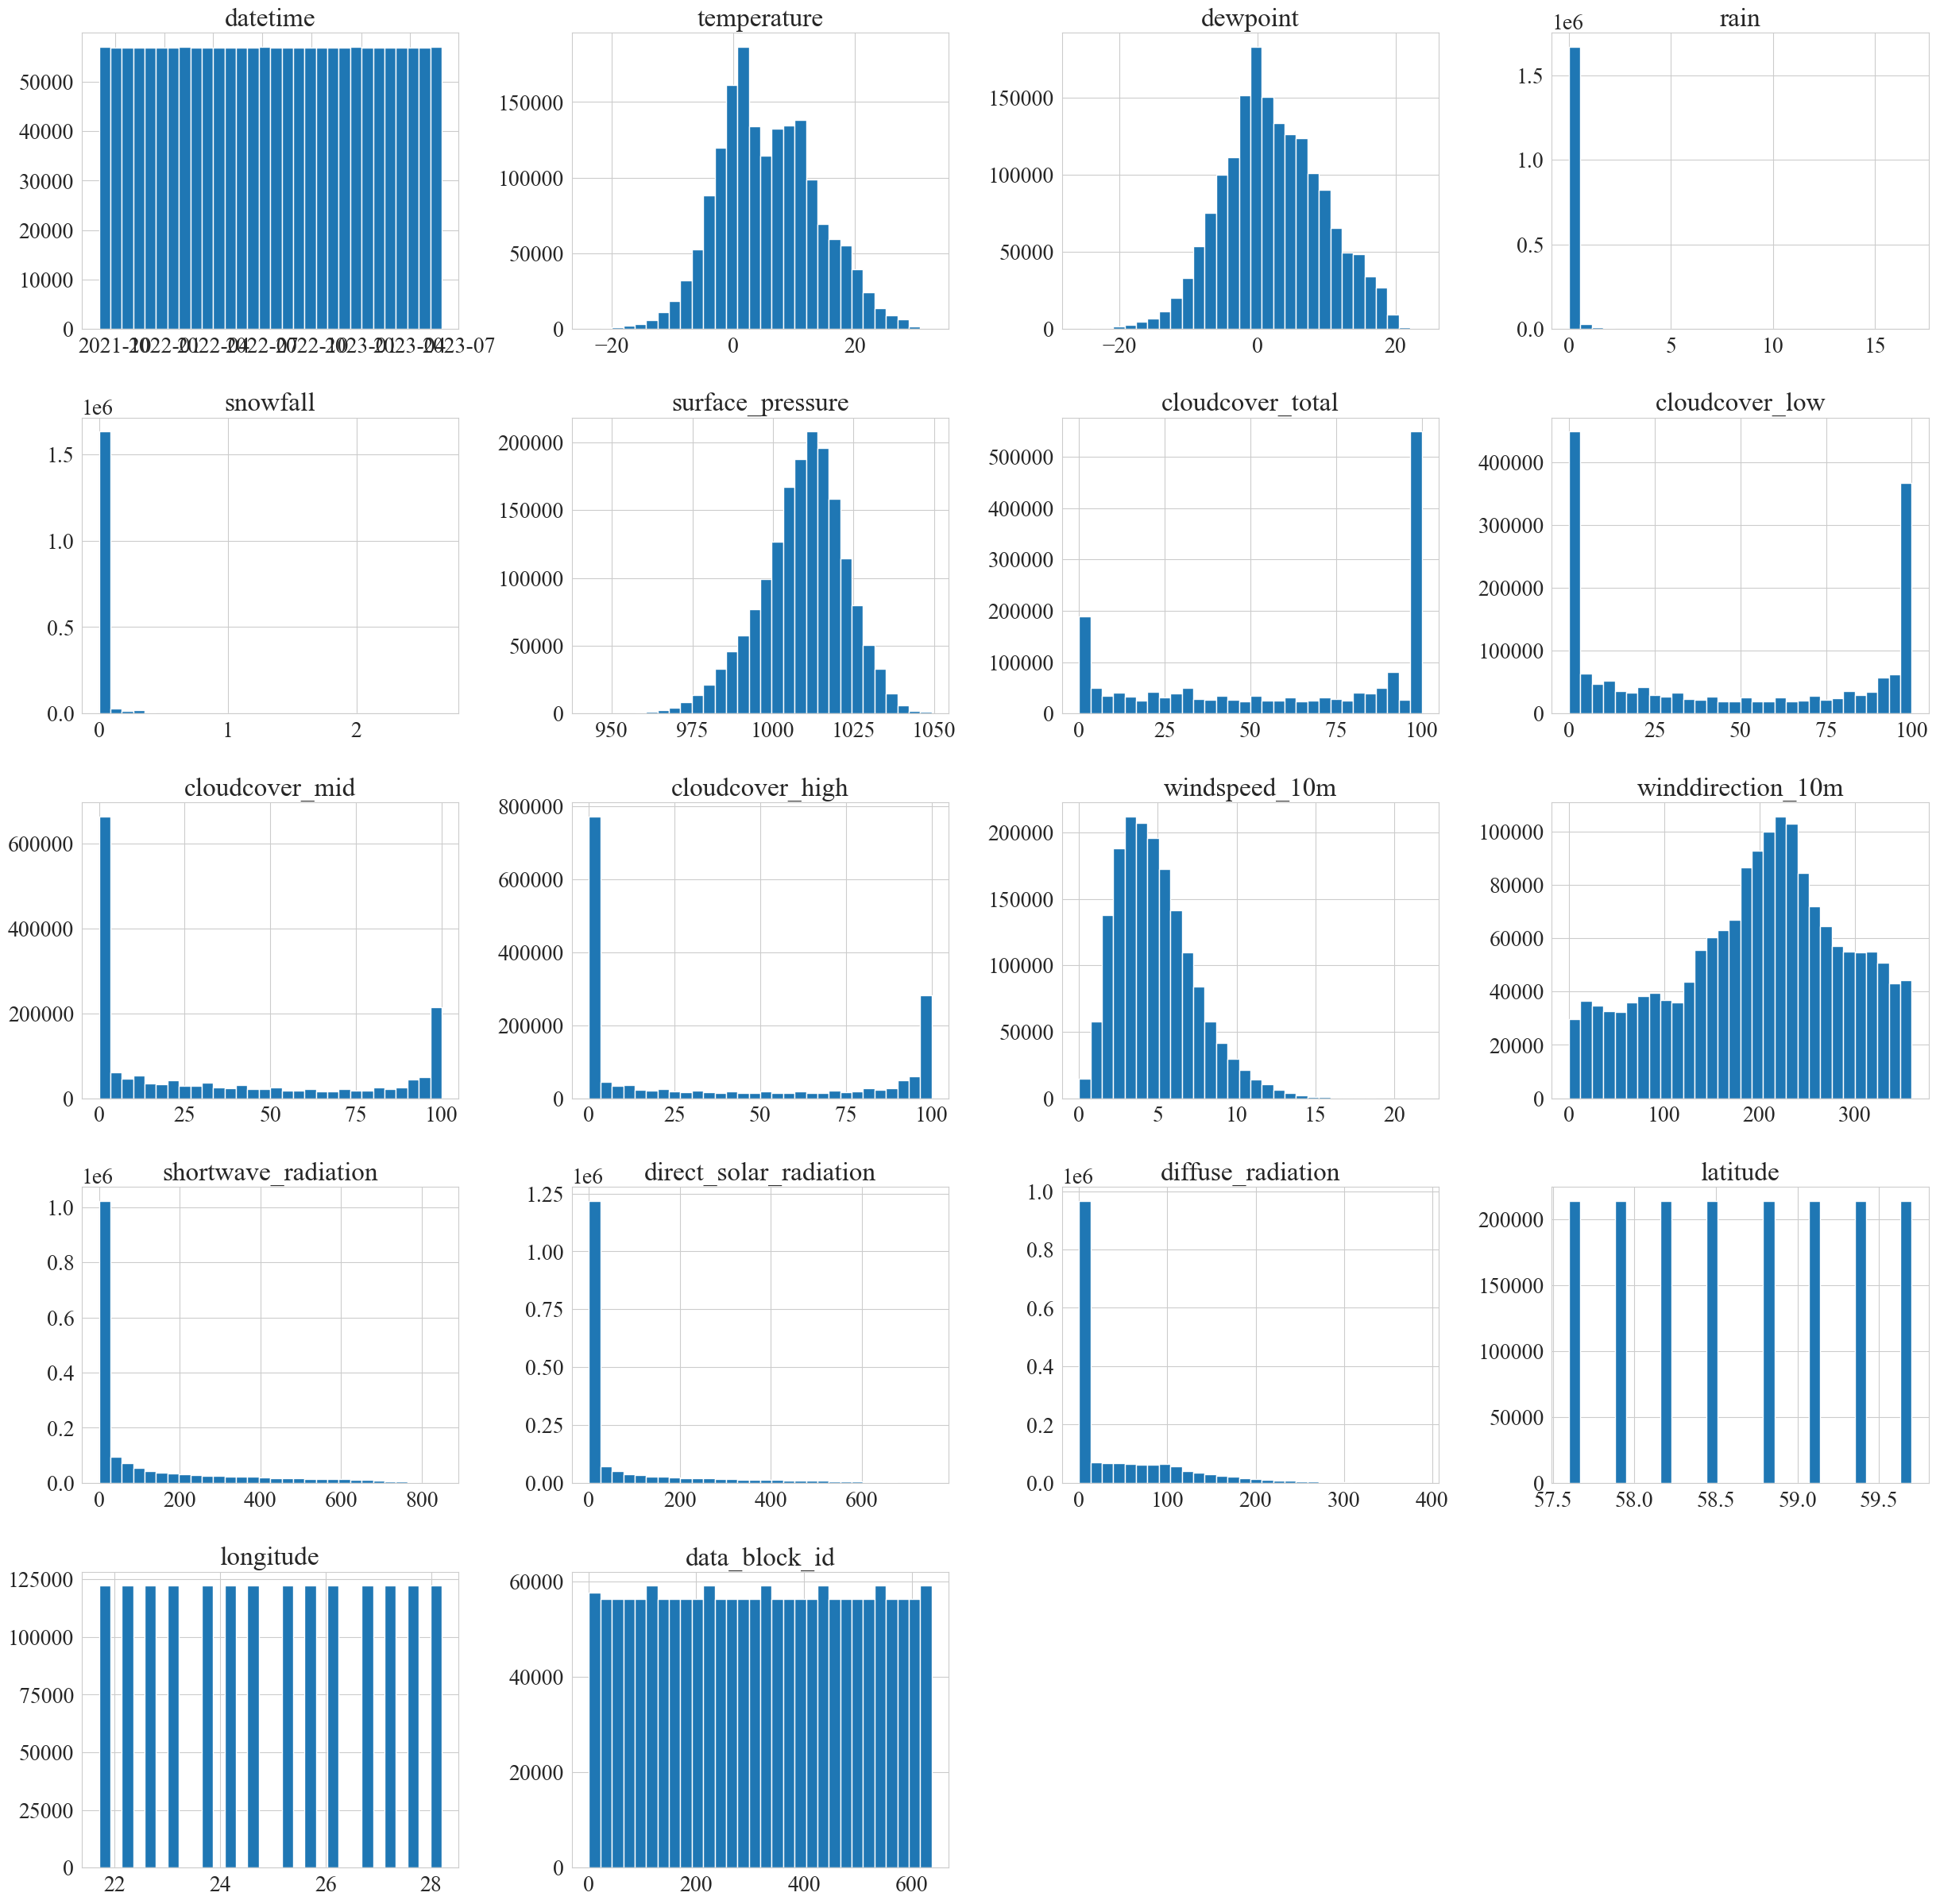

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

h_weather.hist(bins=30, figsize=(30, 30))
plt.show()

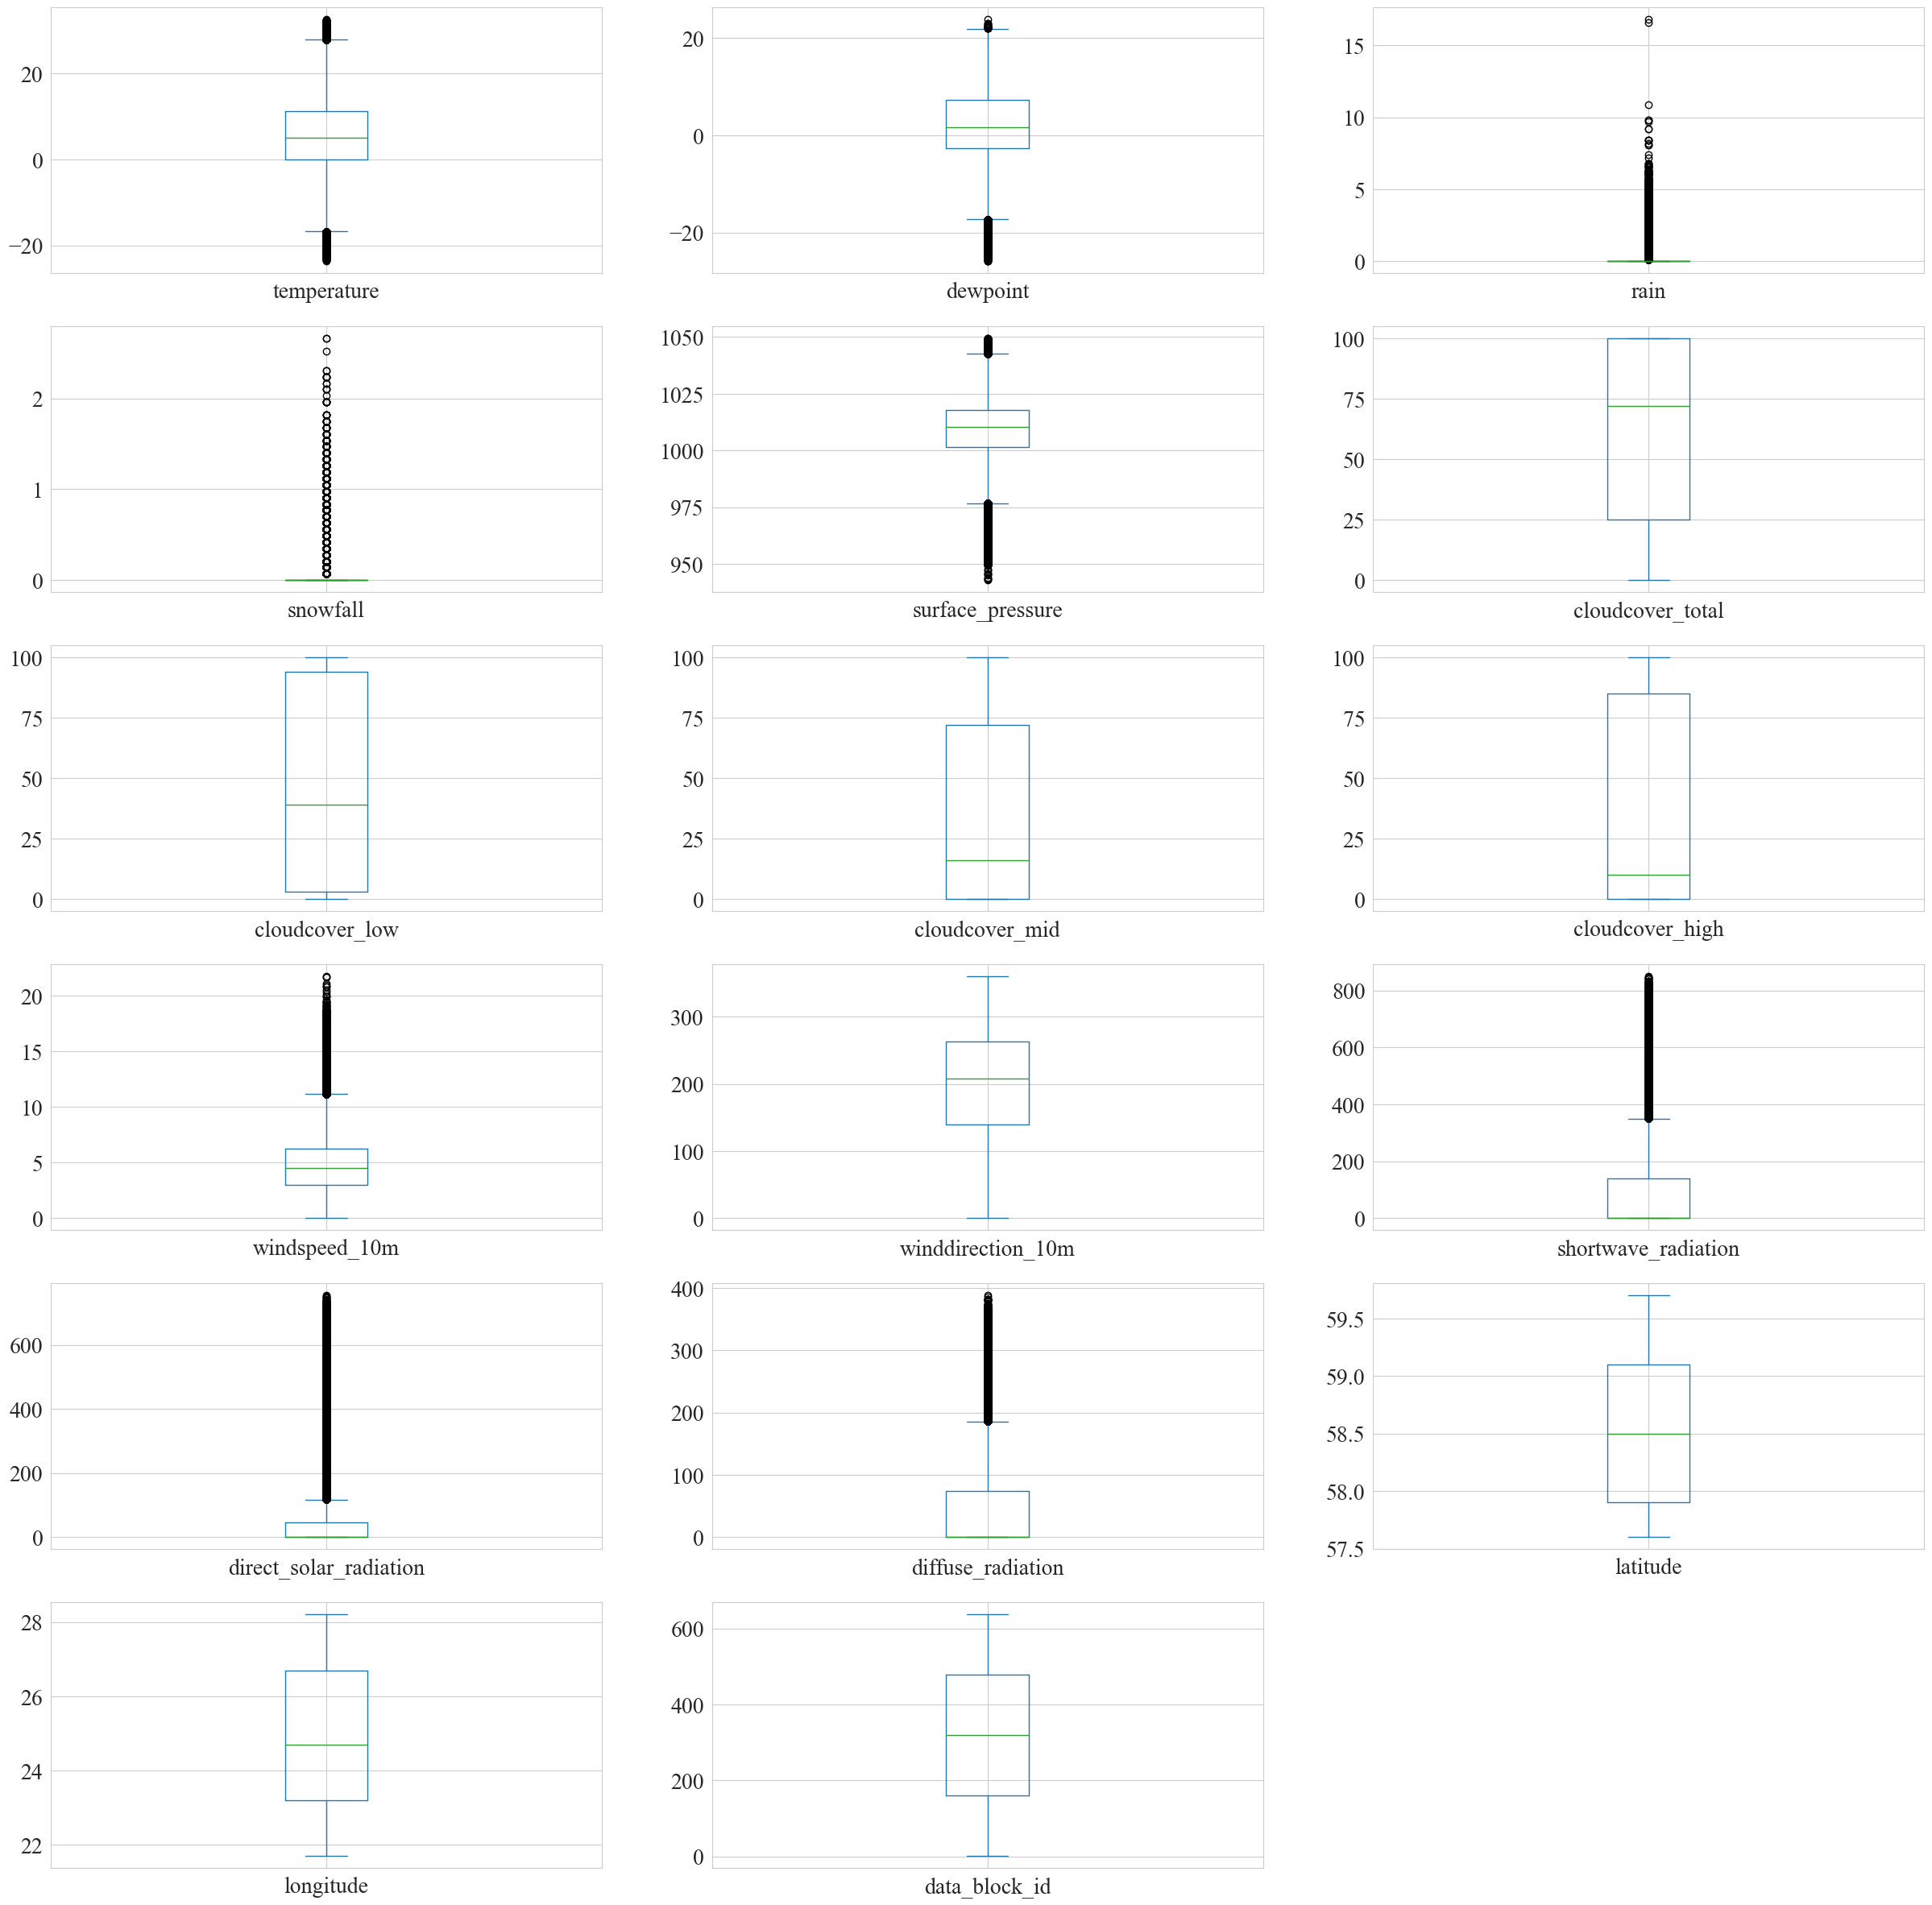

In [31]:
h_weather.plot(kind='box', subplots=True, layout=(ceil(len(h_weather.columns)/3), 3), figsize=(30, 30))
plt.show()

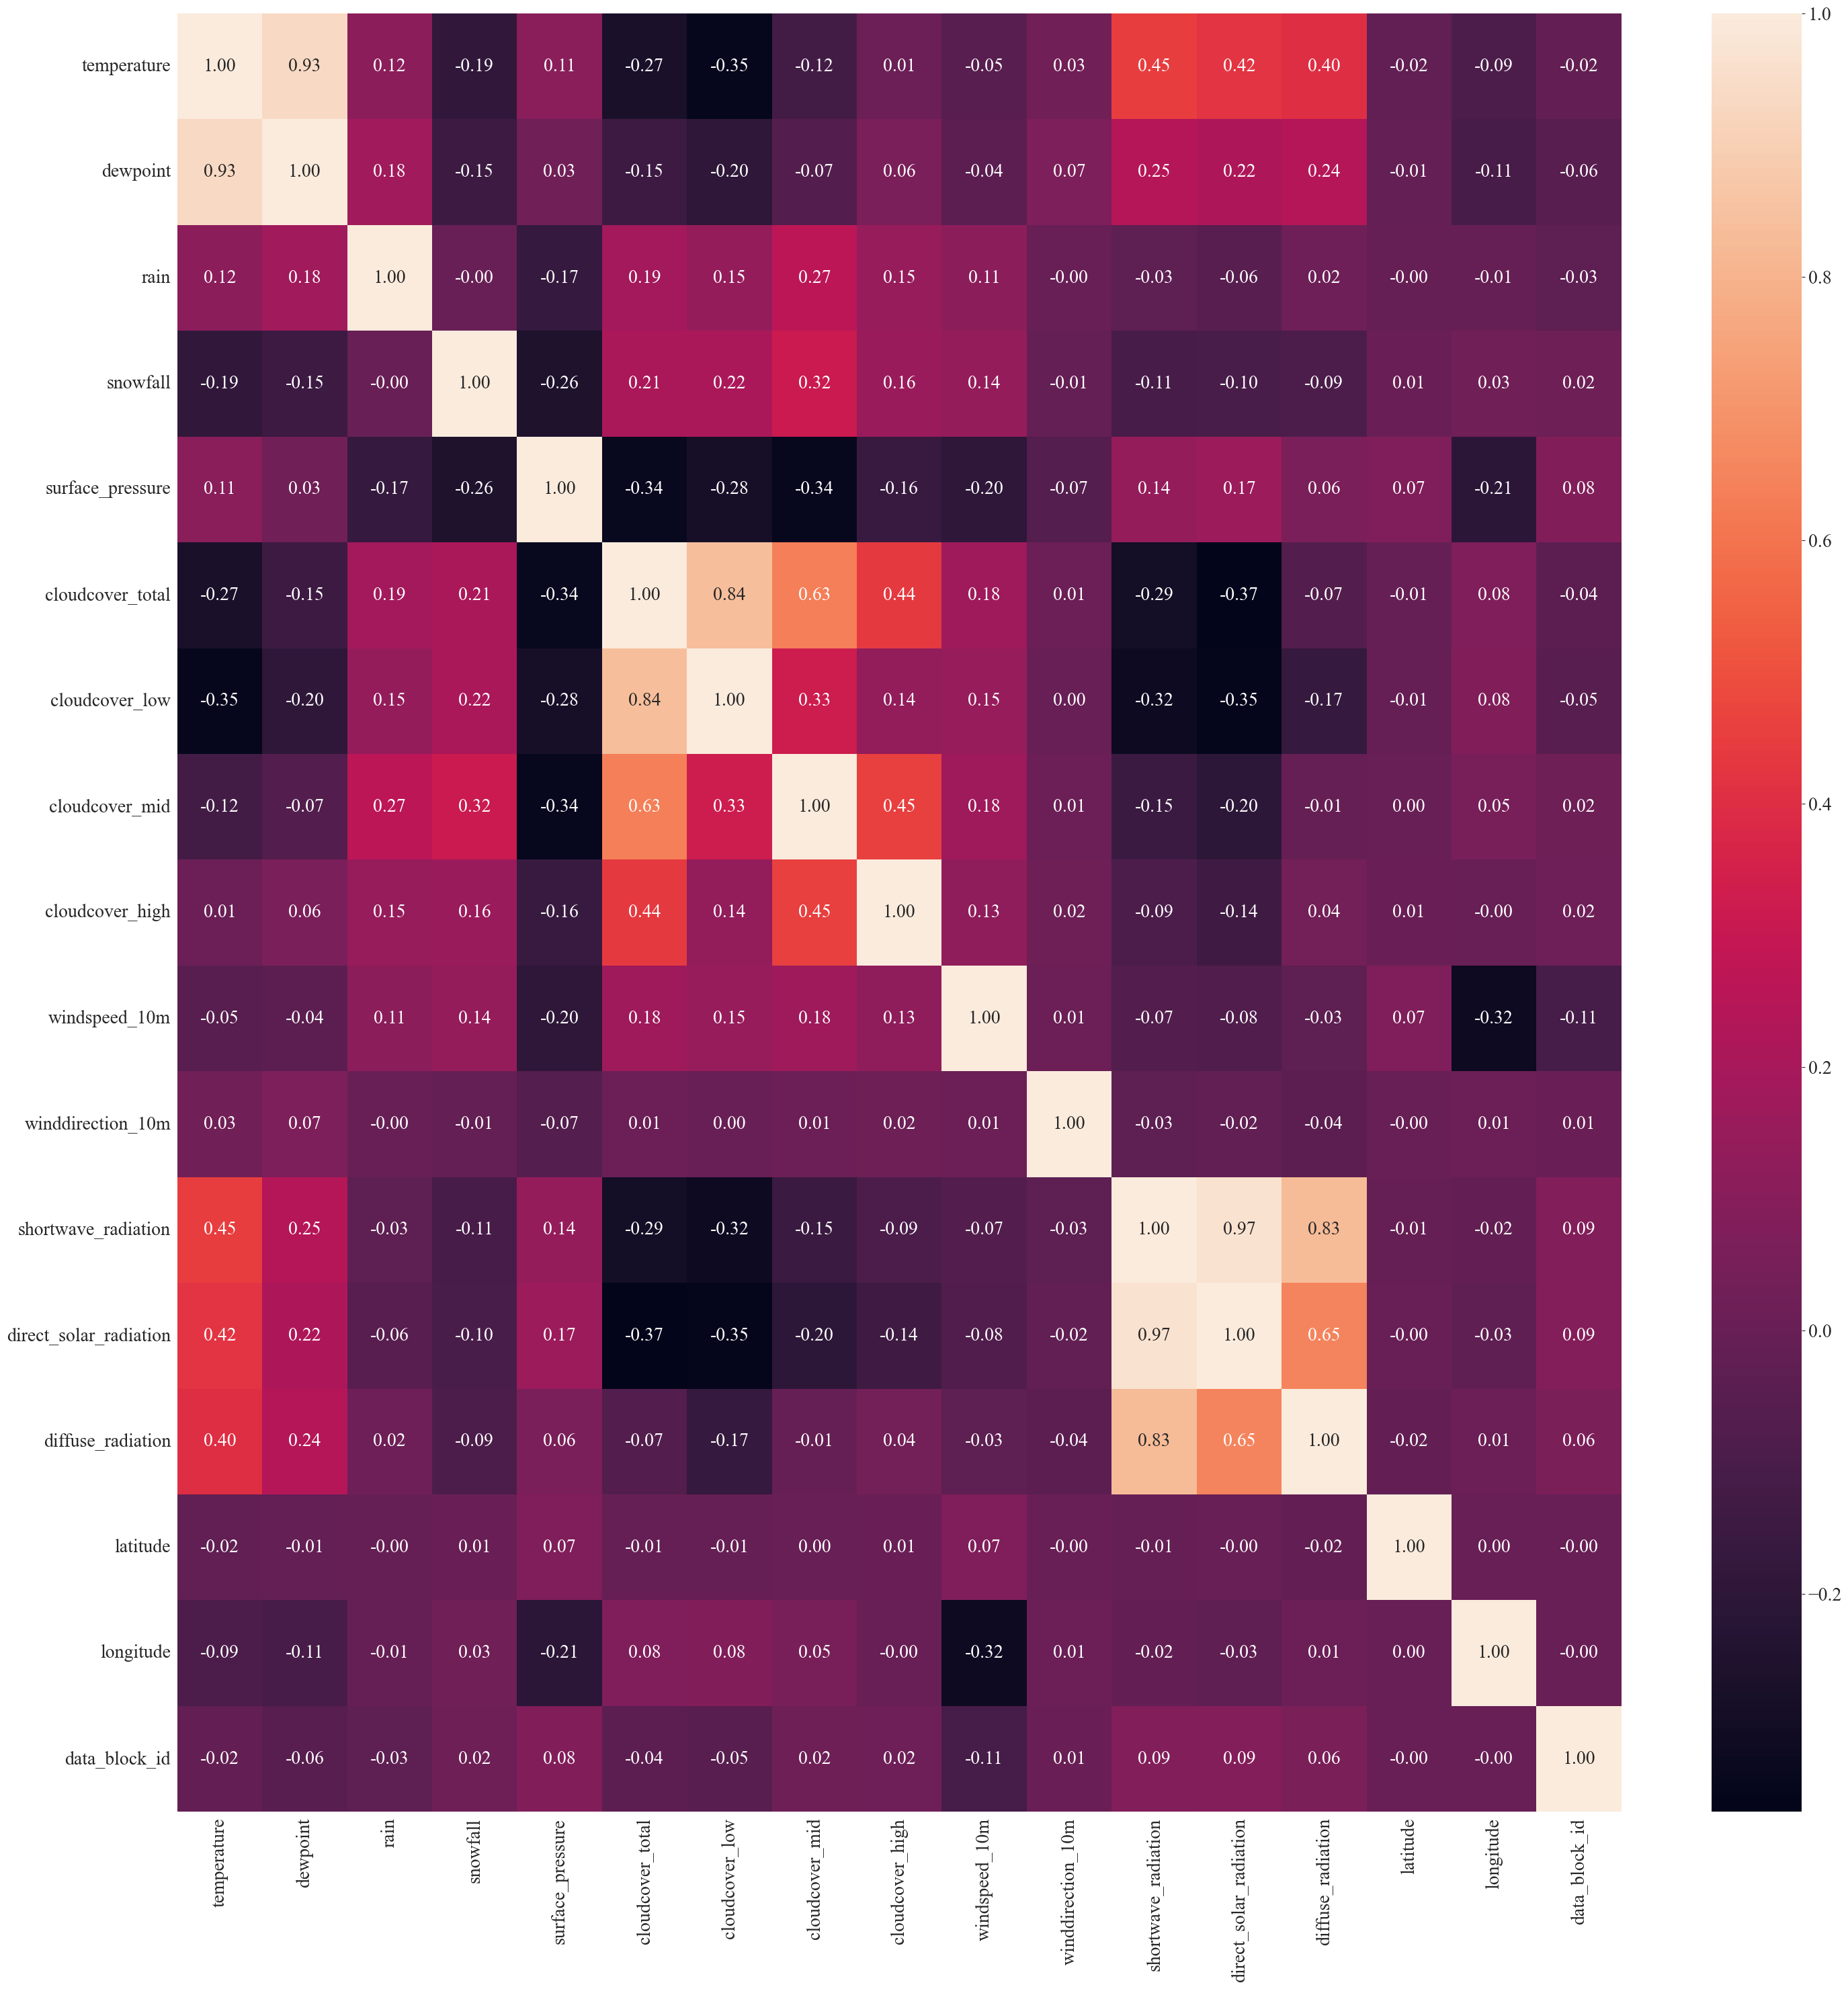

In [32]:
plt.figure(figsize=(30, 30))
sns.heatmap(h_weather.corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

In [33]:
np.random.seed(42)
h_weather_missing = h_weather.copy()

fraction_missing = 0.1 

for num, col in enumerate(h_weather.columns):
    if col != 'datetime' and num in [2, 12]:
        index_rand = h_weather.sample(frac=fraction_missing*num/2).index
        h_weather_missing.loc[index_rand, col]= np.nan
        
h_weather_missing.loc[(h_weather_missing['temperature']>25), ['cloudcover_high','cloudcover_low']]= np.nan
h_weather_missing.loc[(h_weather_missing['temperature']==0), ['windspeed_10m','cloudcover_low']]= np.nan
h_weather_missing.loc[(h_weather_missing['windspeed_10m']==0), ['diffuse_radiation','temperature']]= np.nan
h_weather_missing.loc[(h_weather_missing['rain']>=1), ['cloudcover_low','temperature']]= np.nan
h_weather_missing.loc[(h_weather_missing['cloudcover_high'] >= 40) & (h_weather_missing['cloudcover_high'] <= 60), ['data_block_id', 'temperature']] = np.nan
h_weather_missing.loc[np.isfinite(h_weather_missing['shortwave_radiation']), ['longitude']] = np.nan
h_weather_missing.loc[(np.isfinite(h_weather_missing['shortwave_radiation'])) & (h_weather_missing['temperature']<-10) , ['latitude']] = np.nan
h_weather_missing.loc[(np.isfinite(h_weather_missing['shortwave_radiation'])) & (np.isnan(h_weather_missing['temperature'])) , ['snowfall']] = np.nan
h_weather_missing.loc[(np.isnan(h_weather_missing['cloudcover_high'])) | (np.isnan(h_weather_missing['windspeed_10m']) | (h_weather_missing['temperature']>28)) , ['rain']] = np.nan
h_weather_missing.loc[ (np.isnan(h_weather_missing['data_block_id']) & (h_weather_missing['datetime']< '2022-04')),['surface_pressure']] = np.nan
h_weather_missing.loc[ (np.isnan(h_weather_missing['windspeed_10m']) & (h_weather_missing['datetime']> '2022-09')),['surface_pressure']] = np.nan
h_weather_missing.loc[ (np.isnan(h_weather_missing['latitude']) | (h_weather_missing['direct_solar_radiation']> 26)),['winddirection_10m']] = np.nan
h_weather_missing.loc[ (np.isnan(h_weather_missing['dewpoint'])),['direct_solar_radiation']] = np.nan

In [34]:
print(h_weather_missing.shape)
print(h_weather_missing.isnull().sum())

(1710802, 18)
datetime                        0
temperature                113777
dewpoint                   171080
rain                        24661
snowfall                    45085
surface_pressure            33543
cloudcover_total                0
cloudcover_low              42796
cloudcover_mid                  0
cloudcover_high             16352
windspeed_10m                8309
winddirection_10m          499297
shortwave_radiation       1026481
direct_solar_radiation     171080
diffuse_radiation              87
latitude                    10271
longitude                  684321
data_block_id               96982
dtype: int64


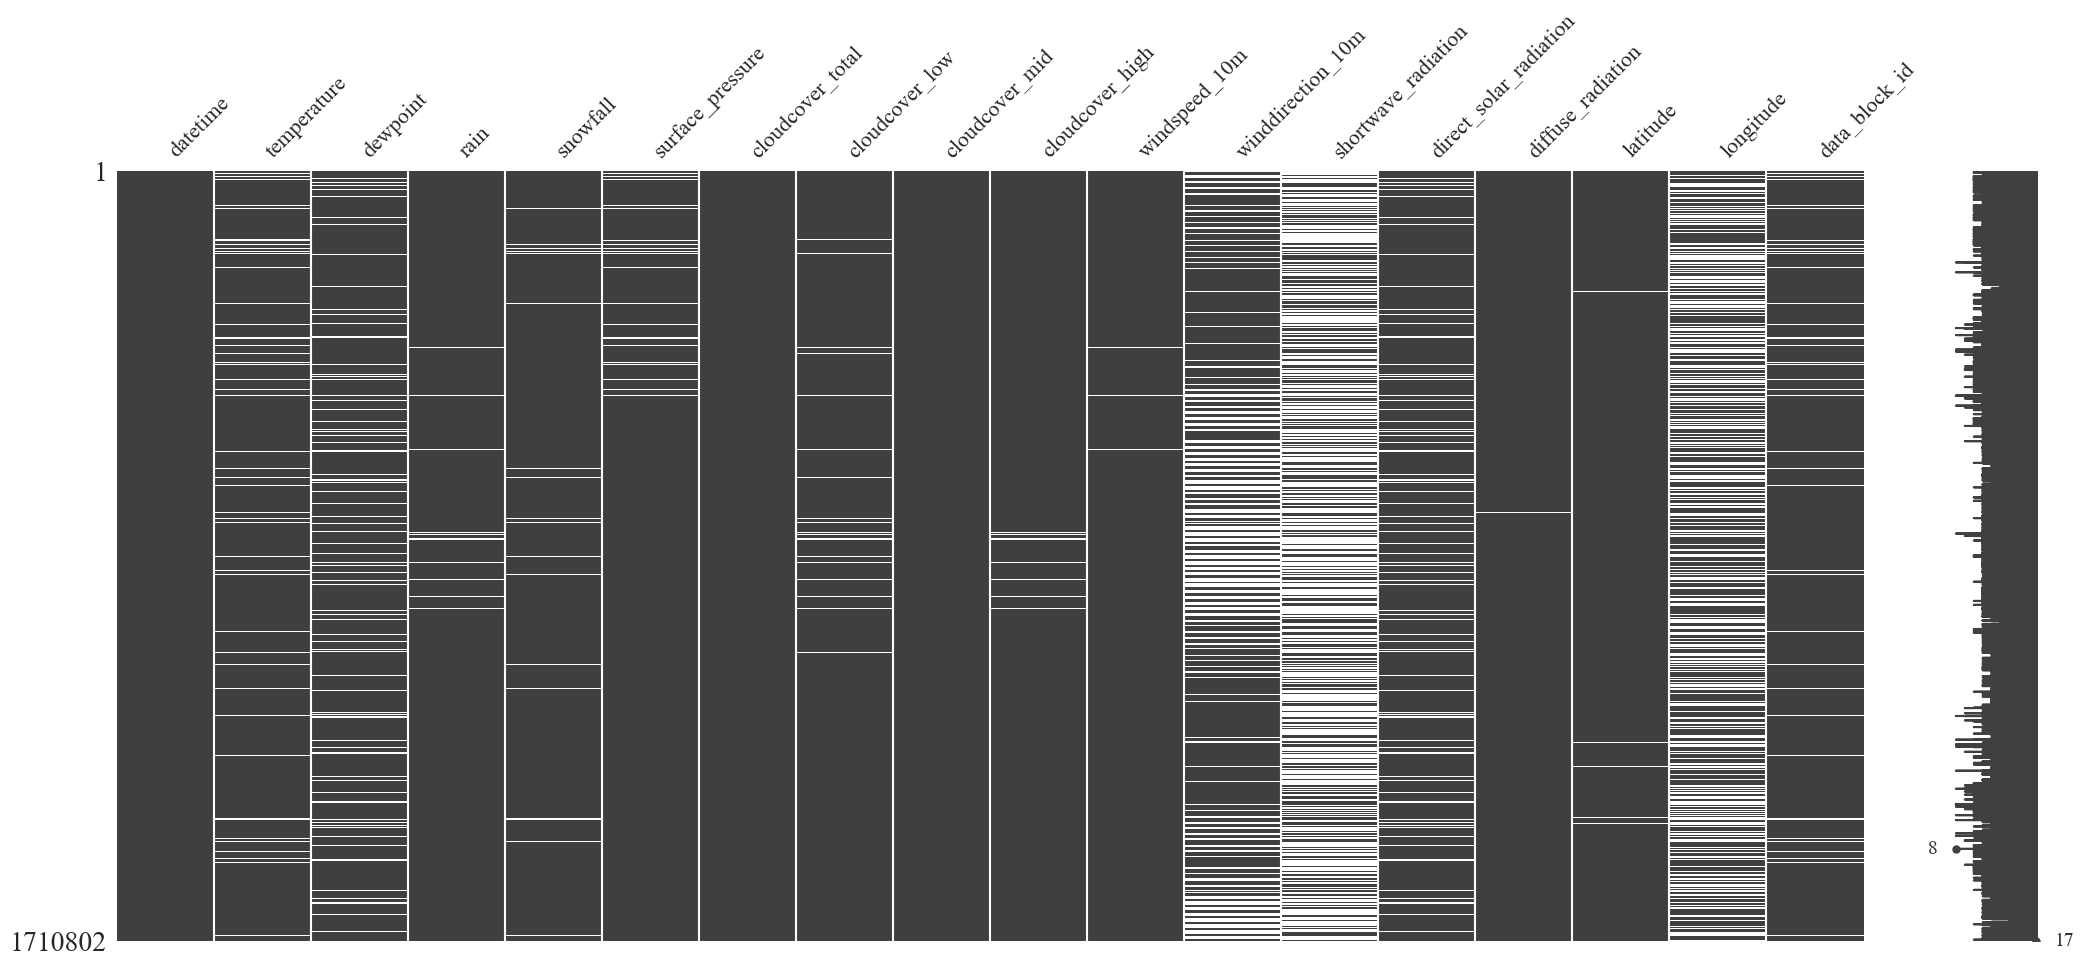

In [35]:
import missingno as msno

msno.matrix(h_weather_missing)
plt.show()

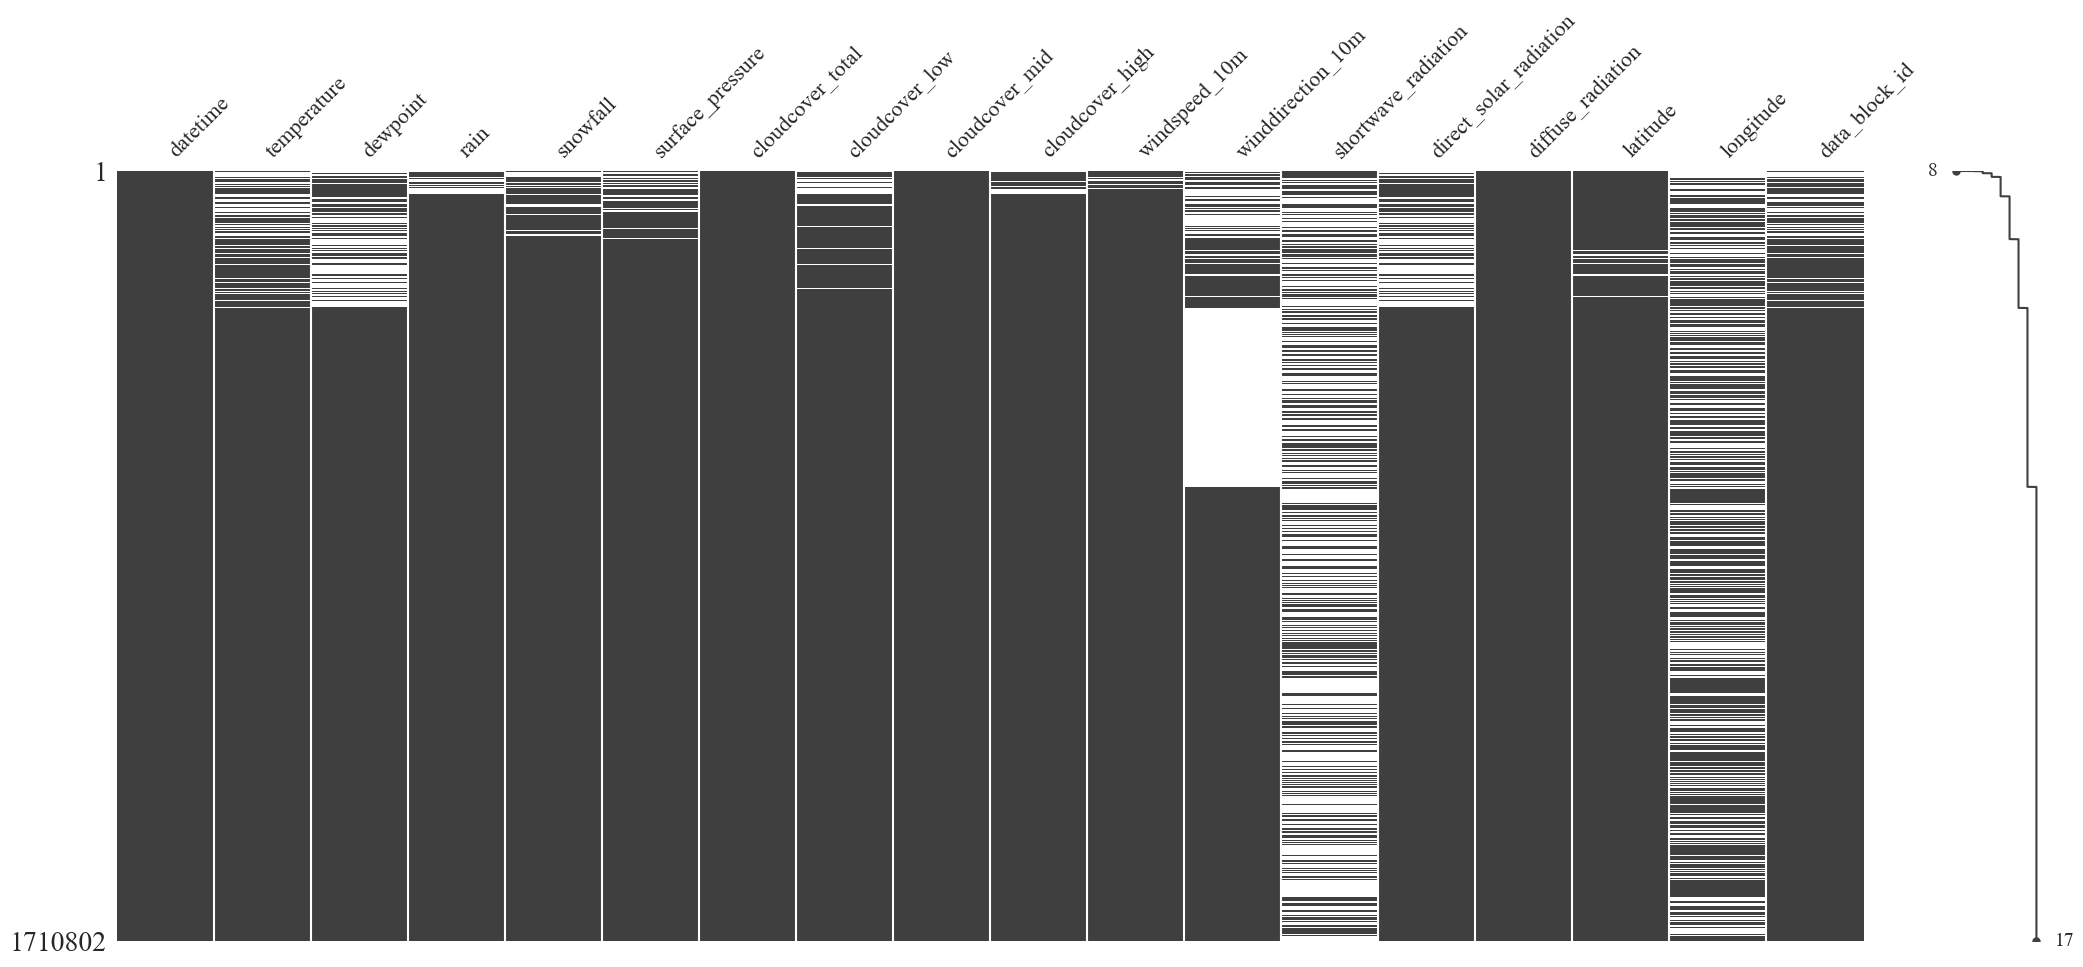

In [36]:
msno.matrix(h_weather_missing, sort='ascending')
plt.show()

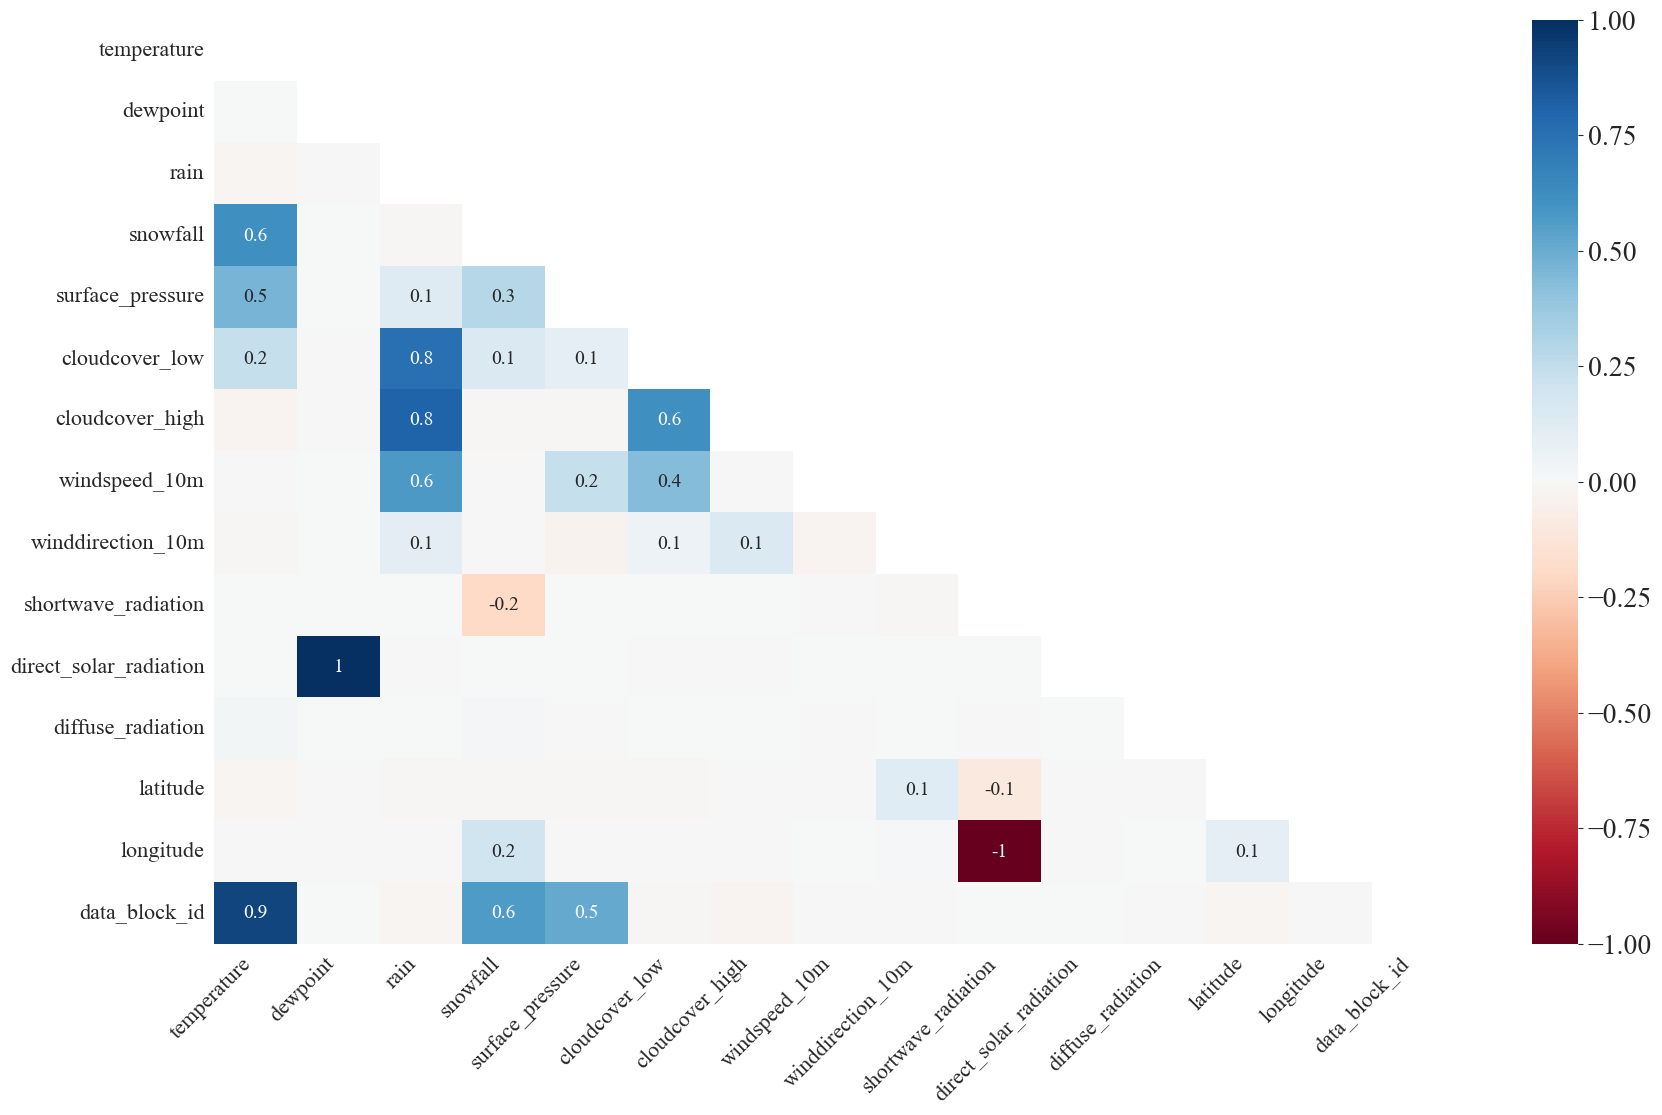

In [37]:
msno.heatmap(h_weather_missing)
plt.show()

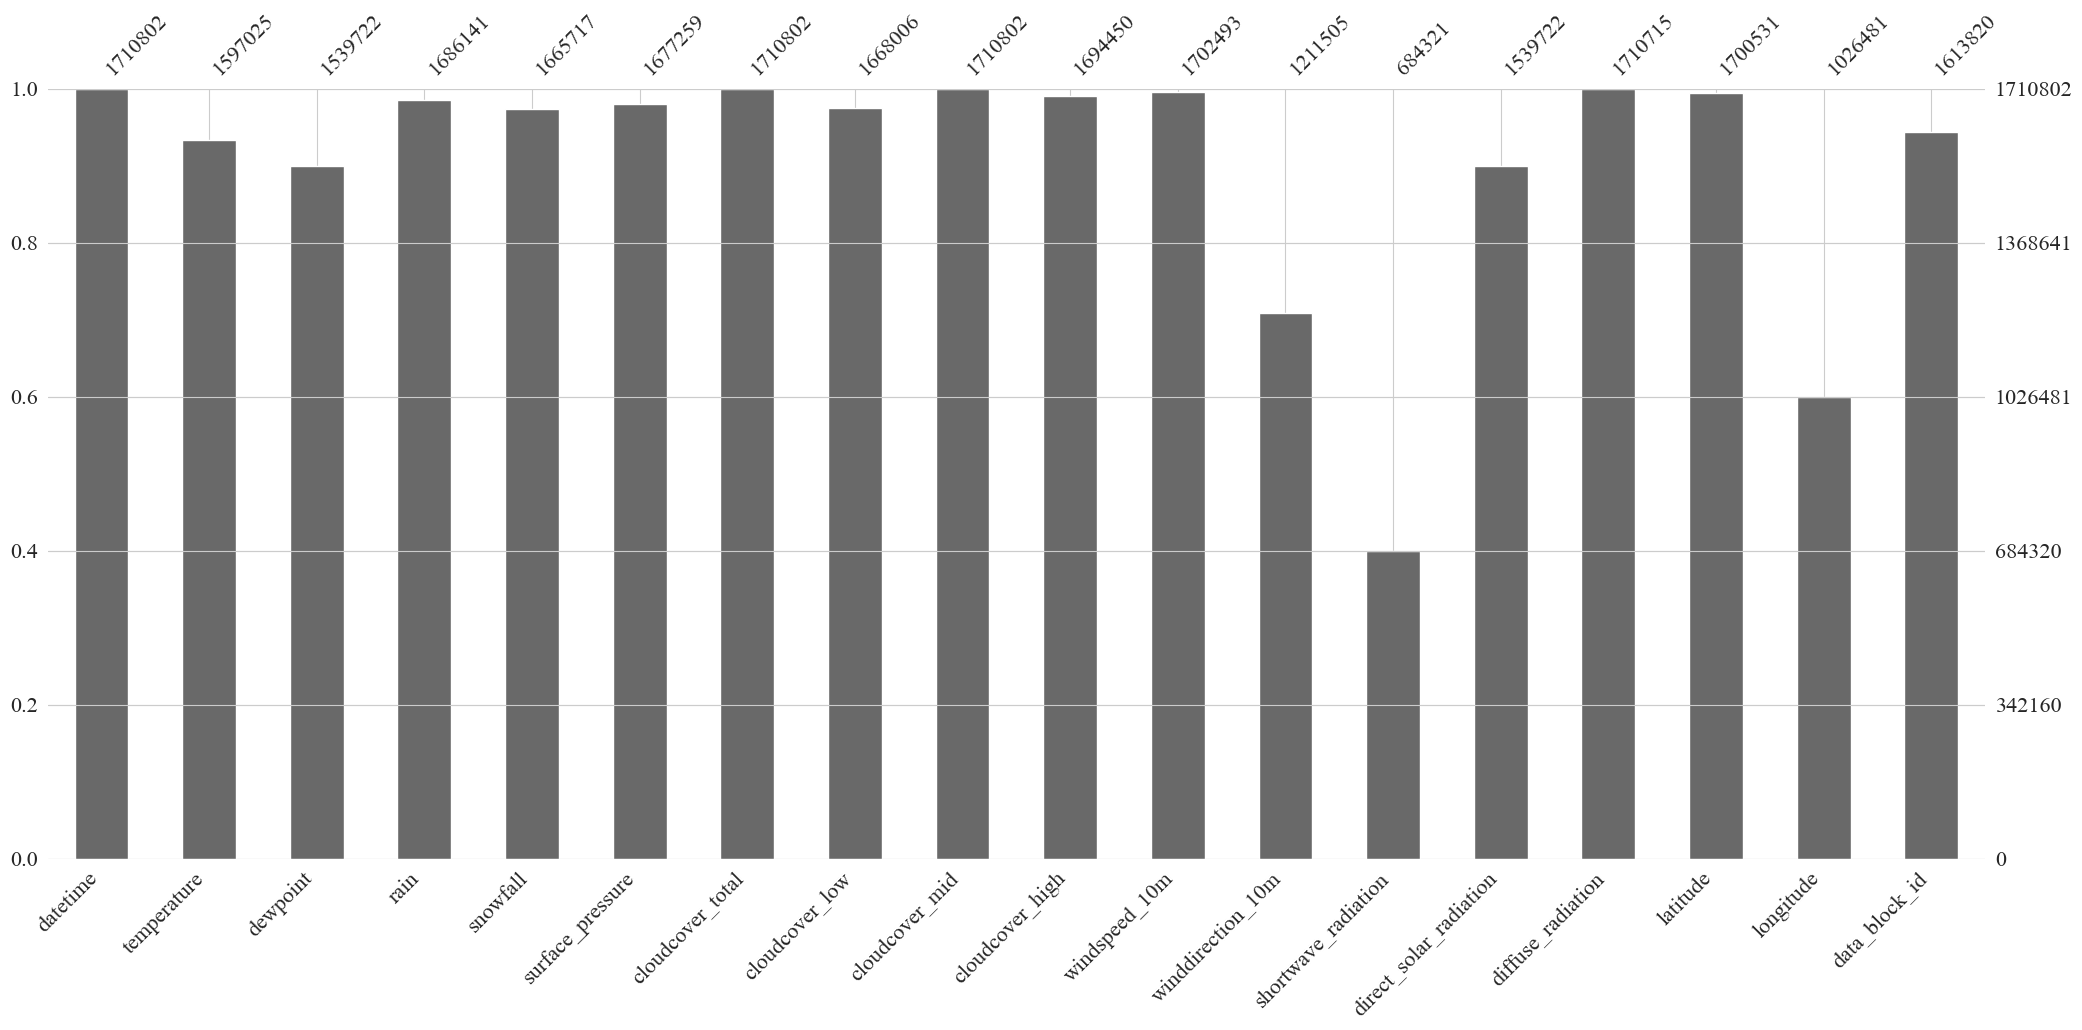

In [38]:
msno.bar(h_weather_missing)
plt.show()

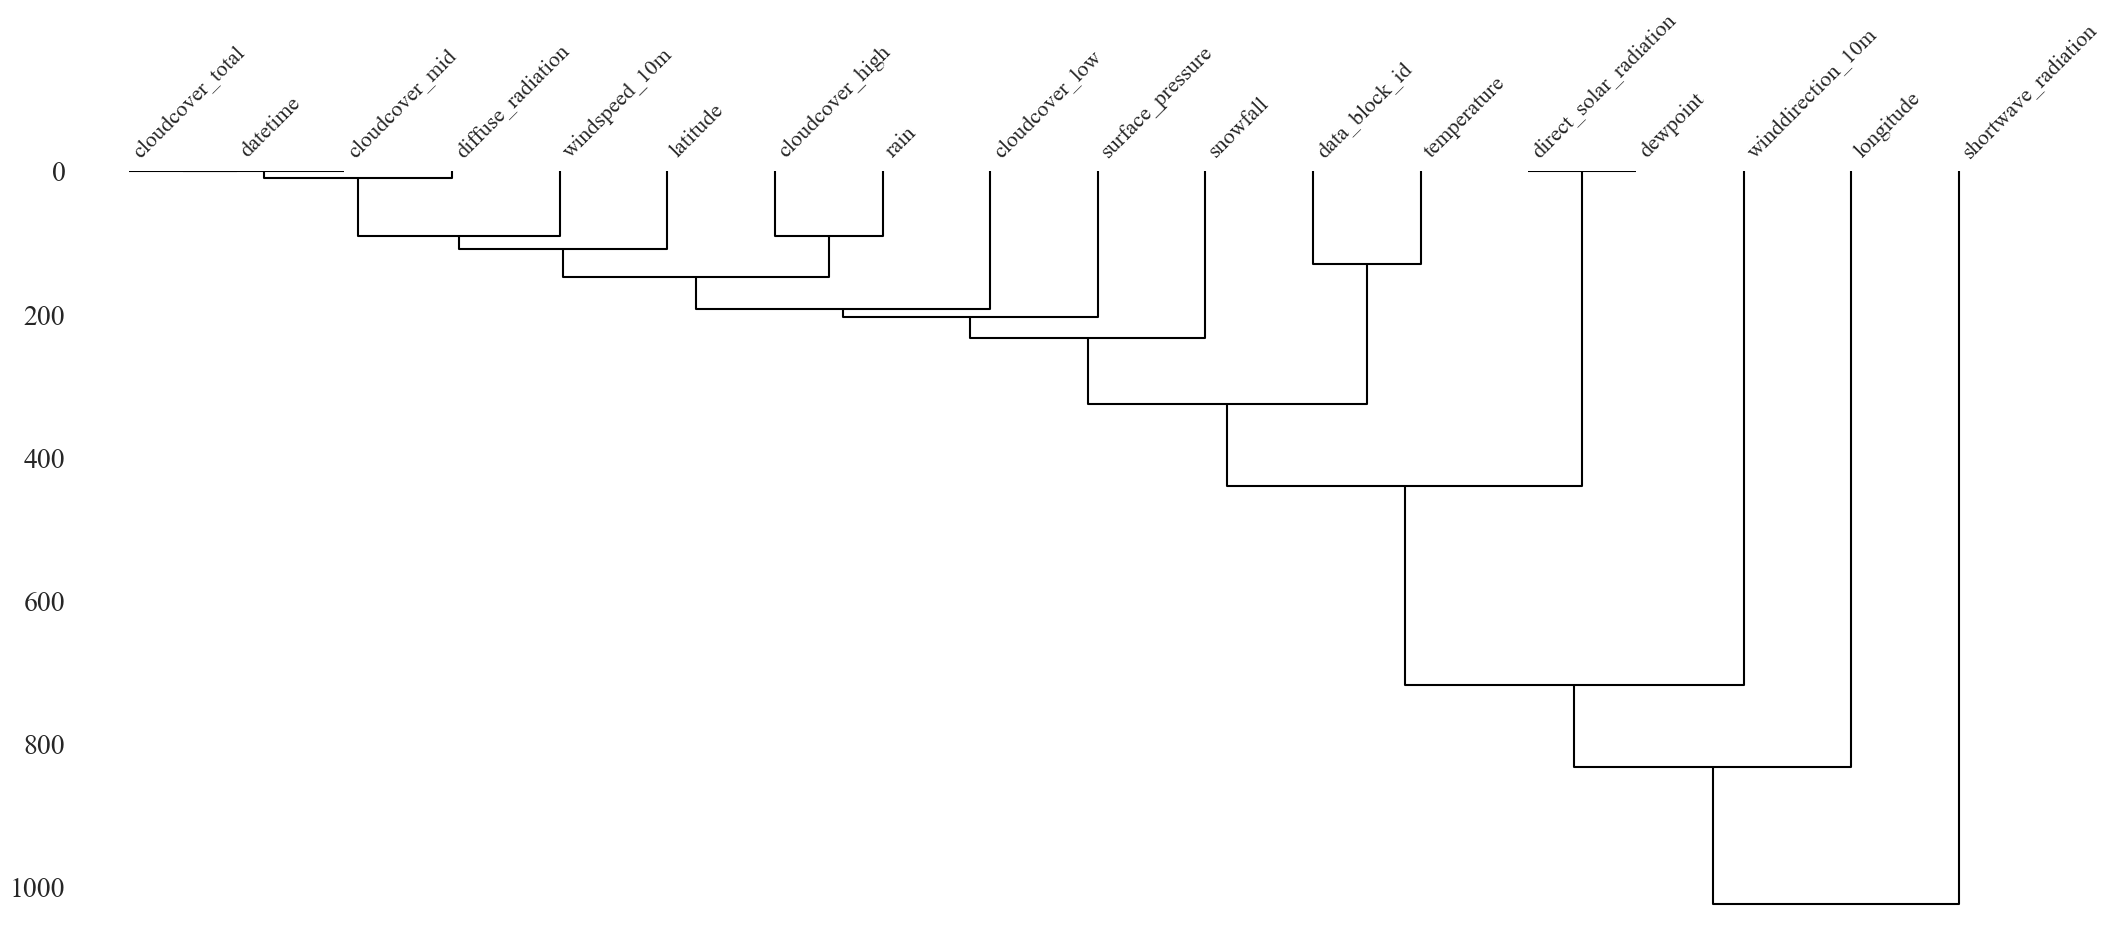

In [39]:
msno.dendrogram(h_weather_missing)
plt.show()

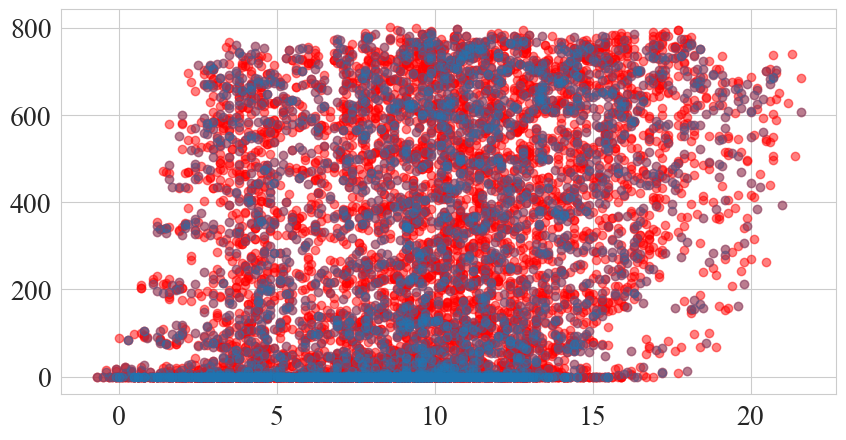

In [40]:
indices = (h_weather['latitude'] > 59.6) & (h_weather['datetime'] > '2023-05-01') 

fig= plt.figure(figsize=(10, 5))
plt.scatter(
    h_weather.loc[ indices , 'temperature'],
    h_weather.loc[indices , 'shortwave_radiation'],
    color='red', alpha=0.5
)
plt.scatter(
    
    h_weather_missing.loc[ indices , 'temperature'],
    h_weather_missing.loc[indices, 'shortwave_radiation'],
    alpha=0.3
)

In [41]:
h_weather_missing_imp = h_weather_missing.copy()
h_weather_missing_imp.fillna(h_weather_missing_imp.mean(), inplace=True)

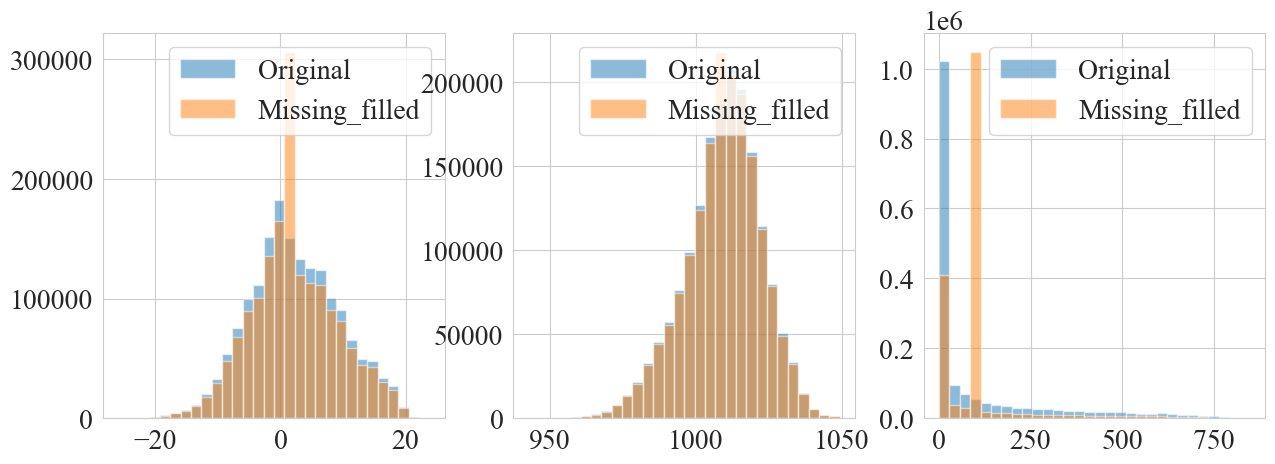

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

h_weather['dewpoint'].hist(bins=30, alpha=0.5, ax=ax[0], label='Original')
h_weather_missing_imp['dewpoint'].hist(bins=30, ax=ax[0], label='Missing_filled', alpha=0.5)

h_weather['surface_pressure'].hist(bins=30, alpha=0.5, ax=ax[1], label='Original')
h_weather_missing_imp['surface_pressure'].hist(bins=30, ax=ax[1], label='Missing_filled', alpha=0.5)

h_weather['shortwave_radiation'].hist(bins=30, alpha=0.5, ax=ax[2], label='Original')
h_weather_missing_imp['shortwave_radiation'].hist(bins=30, ax=ax[2], label='Missing_filled', alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

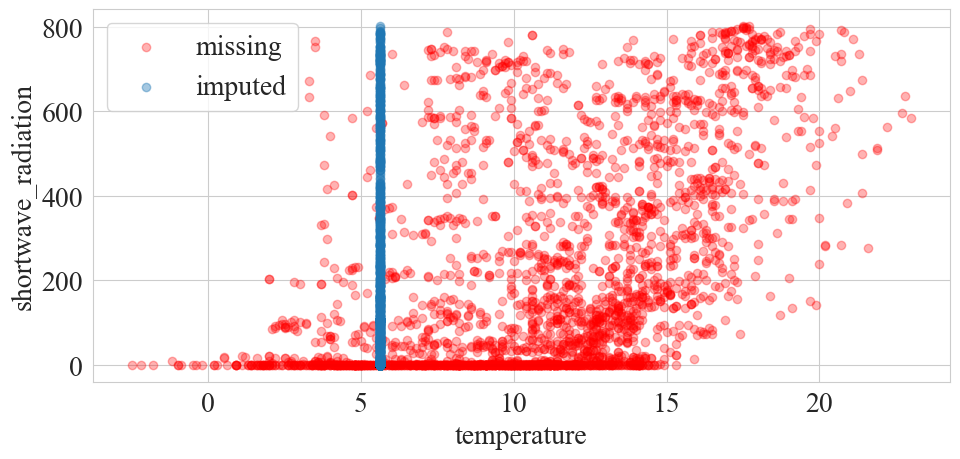

In [43]:
indices = (h_weather['latitude'] > 58.4) & (h_weather['datetime'] > '2023-05-01') & (np.isnan(h_weather_missing['temperature']))

fig= plt.figure(figsize=(10, 5))
plt.scatter(
    h_weather.loc[indices , 'temperature'],
    h_weather.loc[indices , 'shortwave_radiation'],
    color='red', alpha=0.3, label ='missing'
)
plt.scatter(
    
    h_weather_missing_imp.loc[indices , 'temperature'],
    h_weather_missing_imp.loc[indices, 'shortwave_radiation'],
    alpha=0.4, label='imputed'
)
plt.ylabel('shortwave_radiation')
plt.xlabel('temperature')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
h_weather_missing_imp_med = h_weather_missing.copy()
h_weather_missing_imp_med.fillna(h_weather_missing_imp_med.median(), inplace=True)

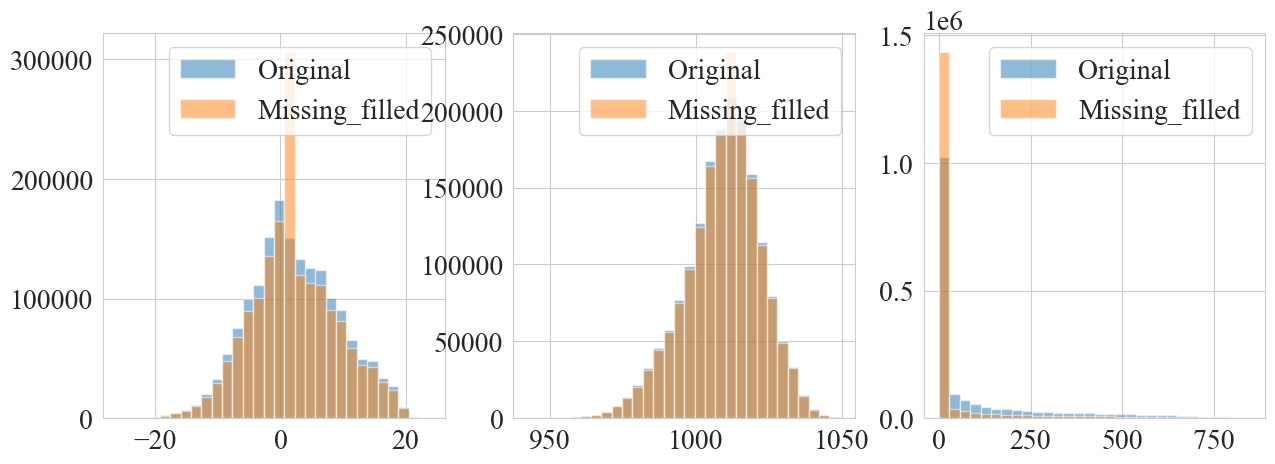

In [45]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

h_weather['dewpoint'].hist(bins=30, alpha=0.5, ax=ax[0], label='Original')
h_weather_missing_imp_med['dewpoint'].hist(bins=30, ax=ax[0], label='Missing_filled', alpha=0.5)

h_weather['surface_pressure'].hist(bins=30, alpha=0.5, ax=ax[1], label='Original')
h_weather_missing_imp_med['surface_pressure'].hist(bins=30, ax=ax[1], label='Missing_filled', alpha=0.5)

h_weather['shortwave_radiation'].hist(bins=30, alpha=0.5, ax=ax[2], label='Original')
h_weather_missing_imp_med['shortwave_radiation'].hist(bins=30, ax=ax[2], label='Missing_filled', alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

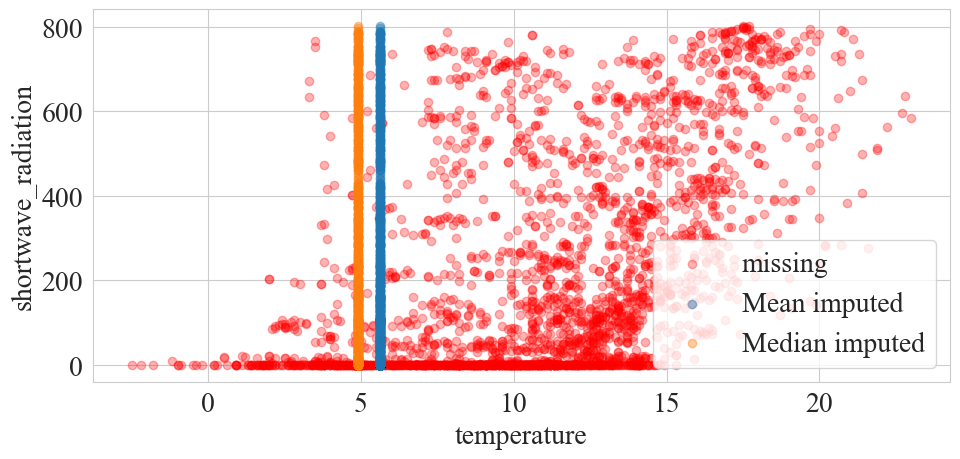

In [46]:
indices = (h_weather['latitude'] > 58.4) & (h_weather['datetime'] > '2023-05-01') & (np.isnan(h_weather_missing['temperature']))

fig= plt.figure(figsize=(10, 5))
plt.scatter(
    h_weather.loc[indices , 'temperature'],
    h_weather.loc[indices , 'shortwave_radiation'],
    color='red', alpha=0.3, label ='missing'
)
plt.scatter(
    
    h_weather_missing_imp.loc[indices , 'temperature'],
    h_weather_missing_imp.loc[indices, 'shortwave_radiation'],
    alpha=0.4, label='Mean imputed'
)

plt.scatter(
    
    h_weather_missing_imp_med.loc[indices , 'temperature'],
    h_weather_missing_imp_med.loc[indices, 'shortwave_radiation'],
    alpha=0.4, label='Median imputed'
)

plt.ylabel('shortwave_radiation')
plt.xlabel('temperature')
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
import json
import numpy as np
import warnings
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

sns.set_style("whitegrid")
plt.rc('font', family='Times New Roman', size=20)

with open('data/solar_panel_data.json', 'r') as f:
    data = json.load(f)

times = []
powers = []

for entry in data:
    times.append(entry[0])
    powers.append(entry[1])

for i in range(len(times)):
    times[i] = times[i] / 1000

datetime = pd.to_datetime(times, unit='s')
df = pd.DataFrame({'time': datetime, 'power': powers})
df = df.set_index('time')
df = df.resample('5min').asfreq()
df = df.fillna(0)
df = df.loc['1/1/2022':'12/30/2022']
df['date'] = df.index.date
df['time'] = df.index.time
df['date'] = pd.to_datetime(df['date']).dt.date
df['time'] = df['time'].astype(str)
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])
df.drop(columns=['date', 'time'], inplace=True)
df.set_index('datetime', inplace=True)
pv = df
pv.power = pv.power/np.max(pv.power)

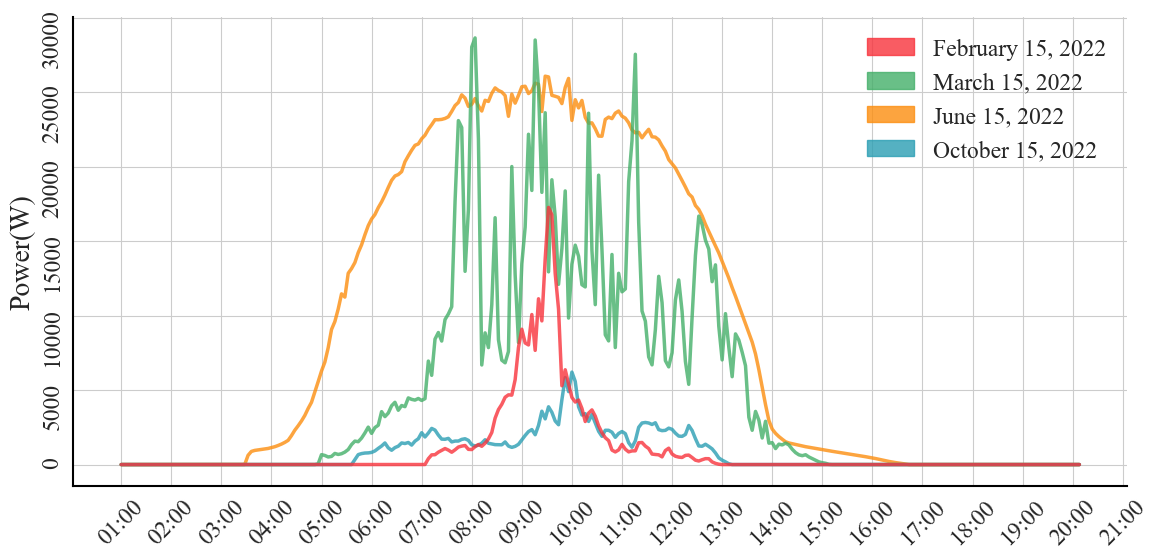

In [48]:
colors = ['#fc8e0f', '#44af69', '#2b9eb3', '#f8333c']

pv.index = pv.index.map(lambda dt: dt.replace(year=2000))
feb = (pv.index.month == 2) & (pv.index.day == 15)
march = (pv.index.month == 4) & (pv.index.day == 15)
june = (pv.index.month == 6) & (pv.index.day == 15)
oct = (pv.index.month == 10) & (pv.index.day == 15)
month_order = [june, march, oct, feb]
time_labels = pv.loc[feb].index.strftime('%H:%M')
color_cycle = iter(colors)
fig, ax = plt.subplots(figsize=(12, 6))
prev_y = 0
for month in month_order:
    color = next(color_cycle)
    plt.plot(pv.loc[month].power.values*28700, linewidth=2.5, color=color, alpha=0.8)
    
plt.ylabel('Power(W)')
jan_label = mpatches.Patch(color=colors[3], label='February 15, 2022', alpha=0.8)
sep_label = mpatches.Patch(color=colors[2], label='October 15, 2022', alpha=0.8)
march_label = mpatches.Patch(color=colors[1], label='March 15, 2022', alpha=0.8)
june_label = mpatches.Patch(color=colors[0], label='June 15, 2022', alpha=0.8)

plt.legend(handles=[jan_label, march_label, june_label, sep_label], fontsize=17, frameon=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=len(time_labels)//12))
ax.set_xticklabels(pv.loc[feb].index[::12].strftime('%H:%M'), rotation=45, fontsize=17)
plt.yticks(fontsize=17, rotation=90)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

sns.despine()
plt.tight_layout()
plt.show()

In [49]:
pv_sample = pv.loc[(pv.index.month == 4) & (pv.index.day <=1) ]
pv_real = pv_sample.copy()

In [50]:
percentage = 0.1
random_indices = np.random.choice(pv_sample.index, int(percentage*pv_sample.shape[0]), replace=False)
random_indices = random_indices[np.argsort(random_indices)]
random_indices_sequence = np.arange(140, 160, 1)
random_indices_sequence = pv_sample.index[random_indices_sequence]

pv_sample.loc[random_indices, 'power'] = np.nan
pv_sample.loc[random_indices_sequence, 'power'] = np.nan

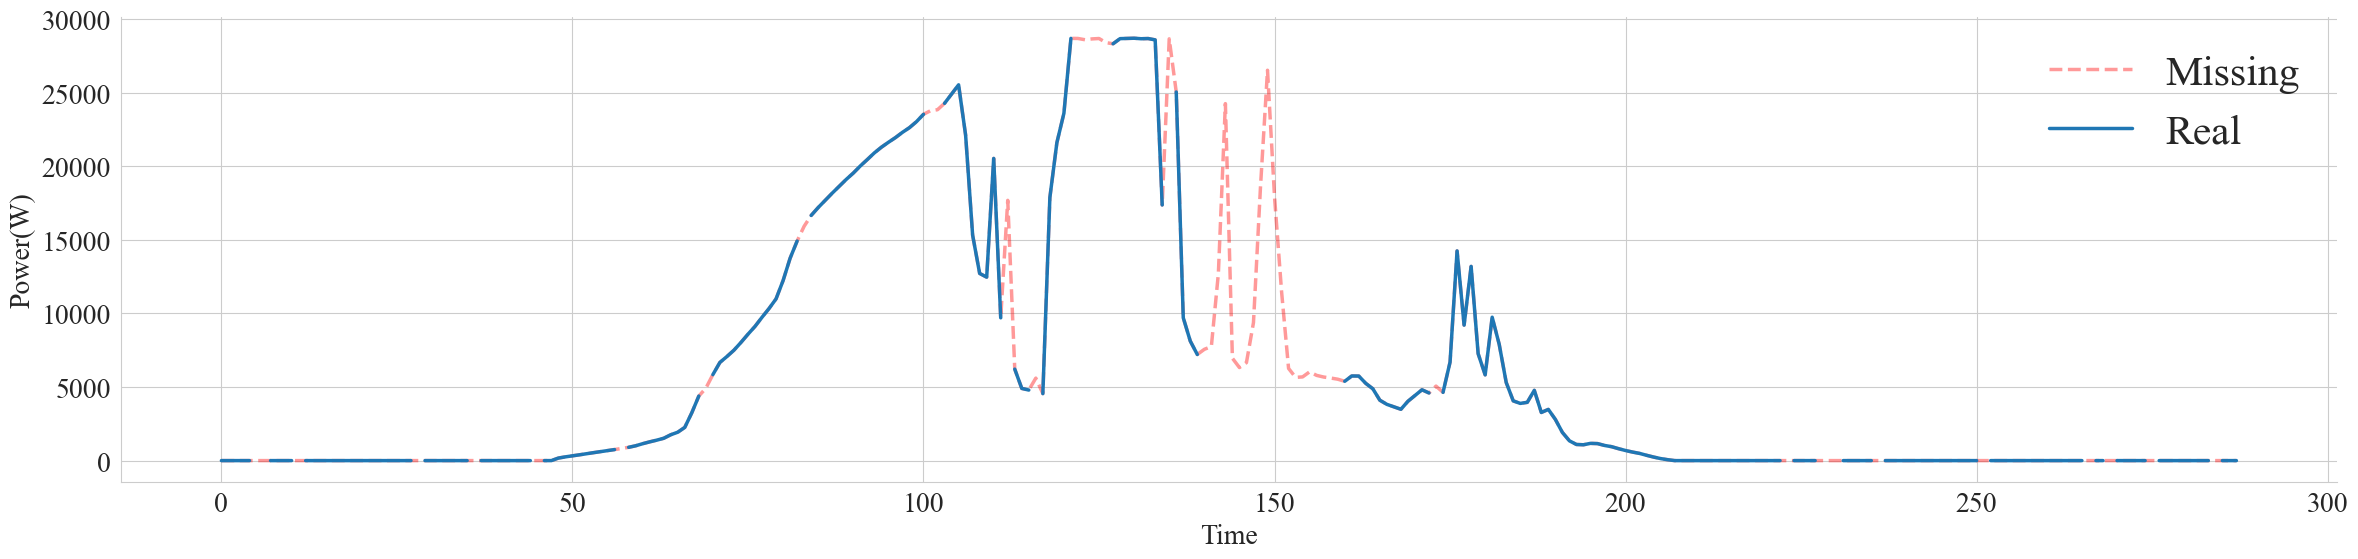

In [51]:
fig = plt.subplots(figsize=(24, 6))
plt.plot(pv_real.power.values*28700, linewidth=2.5, alpha=0.4, color='red', linestyle='--') 
plt.plot(pv_sample.power.values*28700, linewidth=2.5, alpha=1)
plt.ylabel('Power(W)')
plt.xlabel('Time')
sns.despine()
plt.legend(['Missing', 'Real'], fontsize=30, frameon=False)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.impute import SimpleImputer, KNNImputer
from statsmodels.tsa.seasonal import STL

mean_imputer = SimpleImputer(strategy='mean')
pv_sample['power_mean'] = mean_imputer.fit_transform(pv_sample.power.values.reshape(-1, 1))

pv_sample['power_min'] = pv_sample['power'].copy()
pv_sample['power_min'] = pv_sample['power'].fillna(pv_sample['power'].min())

pv_sample['power_max'] = pv_sample['power'].copy()
pv_sample['power_max'] = pv_sample['power'].fillna(pv_sample['power'].max())

median_imputer = SimpleImputer(strategy='median')
pv_sample['power_median'] = median_imputer.fit_transform(pv_sample.power.values.reshape(-1, 1))

pv_sample['power_LOCF'] = pv_sample['power'].ffill()

pv_sample['power_NOCB'] = pv_sample['power'].bfill()

pv_sample['power_linear'] = pv_sample['power'].interpolate(method='linear')

knn_imputer = KNNImputer(n_neighbors=10)
pv_sample['power_KNN'] = knn_imputer.fit_transform(pv_sample.power.values.reshape(-1, 1))

pv_sample['power_spline'] = pv_sample['power'].copy()
pv_sample['power_spline'] = pv_sample['power_spline'].interpolate(method='spline', order=2, limit_direction='forward')

pv_sample['power_stl'] = pv_sample['power'].copy()
imputed_indices = pv_sample[pv_sample['power_stl'].isnull()].index
stl = STL(pv_sample['power_stl'].interpolate(), seasonal=23, period=288)
res = stl.fit()
seasonal_component = res.seasonal

df_deseasonalised = pv_sample['power_stl'] - seasonal_component
df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")
df_imputed = df_deseasonalised_imputed + seasonal_component
pv_sample.loc[imputed_indices, 'power_stl'] = df_imputed[imputed_indices]

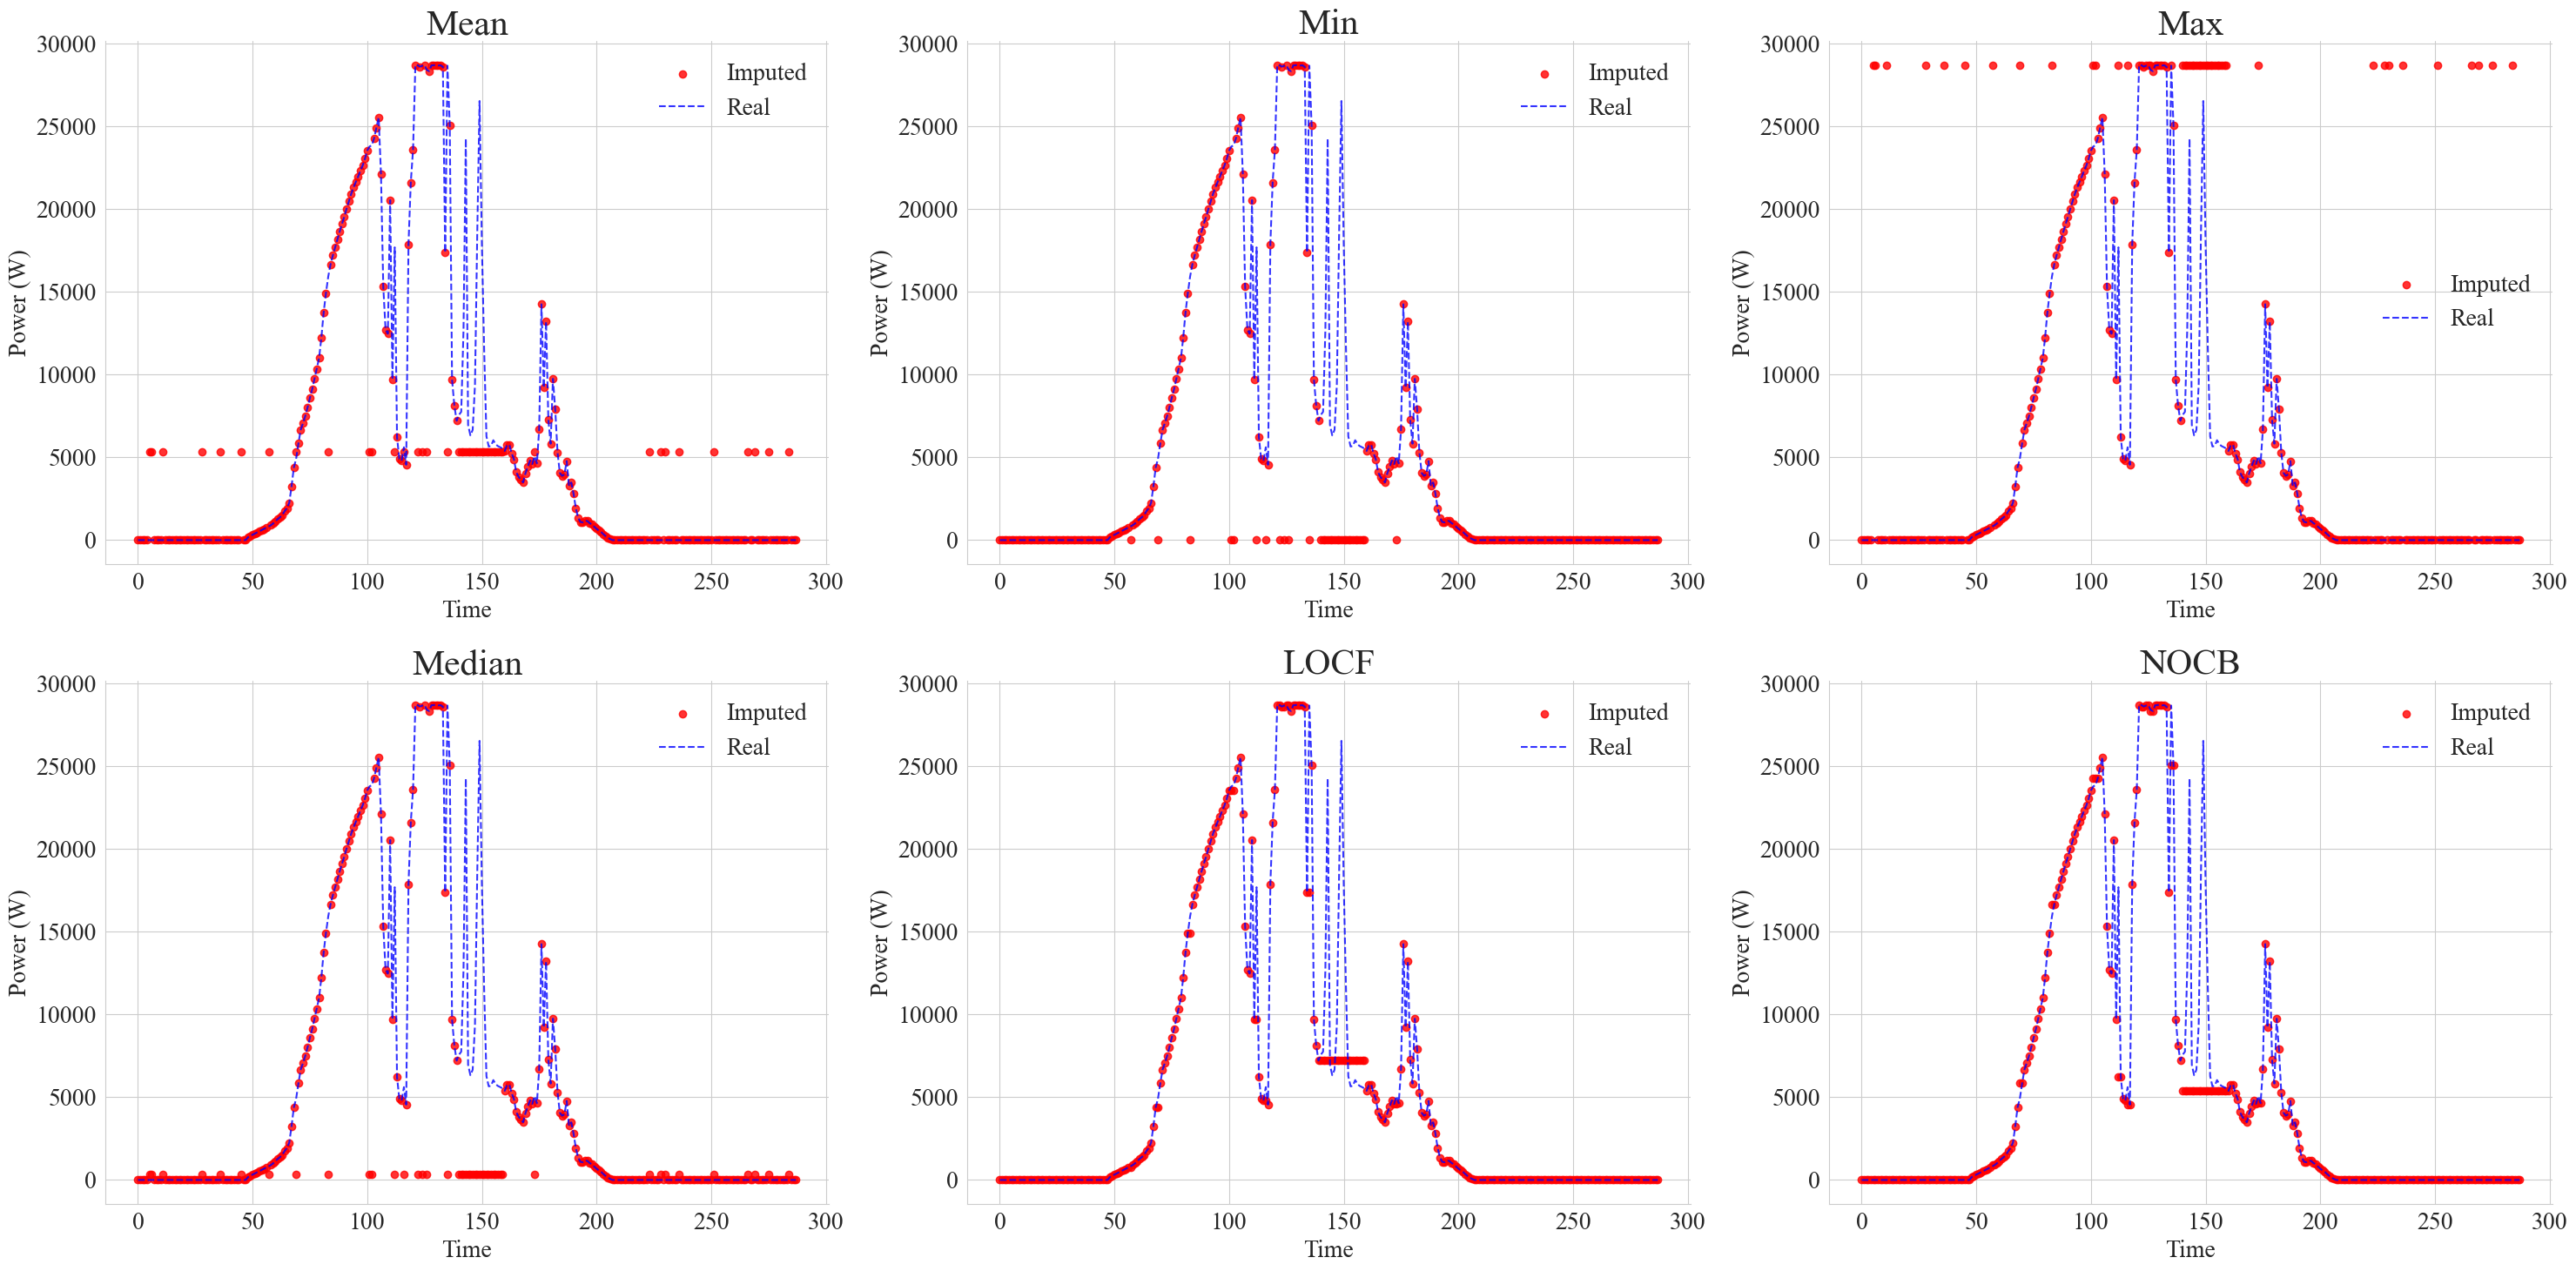

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
ax = ax.flatten()
methods = ['Mean', 'Min', 'Max', 'Median', 'LOCF', 'NOCB']
for i, col in enumerate(pv_sample.columns[1:-4]):
    # ax[i].plot(pv_sample[col].values*28700, linewidth=2.5, alpha=0.8, color='red')
    ax[i].scatter(range(np.size(pv_real)), pv_sample[col].values*28700, alpha=0.8, color='red')
    ax[i].plot(pv_real['power'].values*28700, linewidth=1.5, alpha=0.8, color='blue', linestyle='--')
    ax[i].set_title(methods[i], fontsize=30)
    ax[i].set_ylabel('Power (W)')
    ax[i].set_xlabel('Time')
    ax[i].legend(['Imputed', 'Real'], fontsize=20, frameon=False)

sns.despine()
plt.tight_layout()
# plt.savefig('imputation_methods.png', dpi=300)
plt.show()


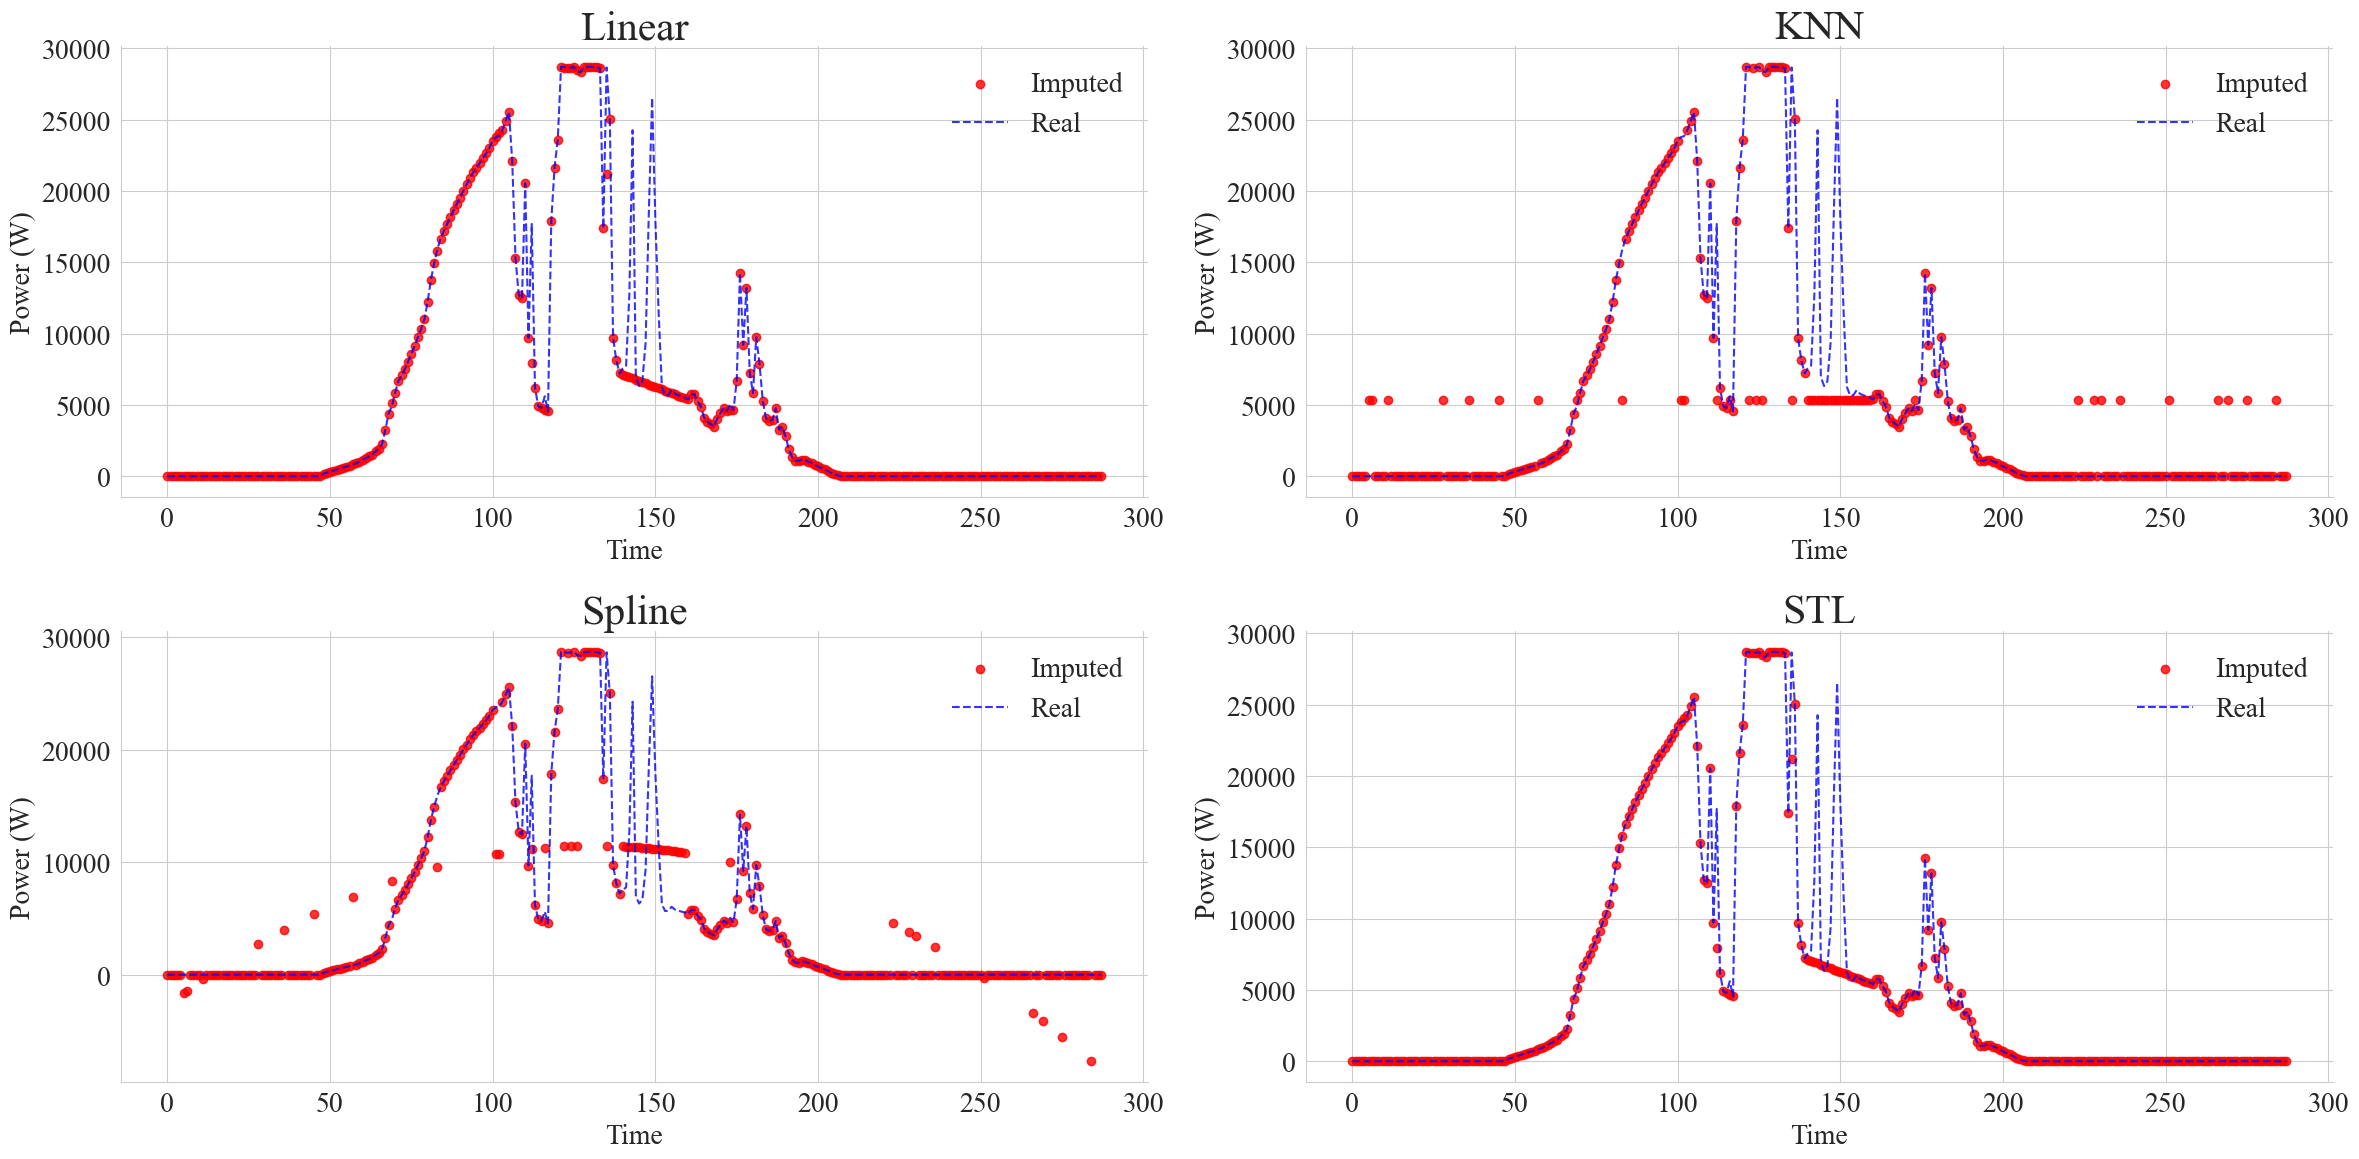

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
ax = ax.flatten()
methods = ['Linear','KNN', 'Spline', 'STL']
for i, col in enumerate(pv_sample.columns[-4:]):
    # ax[i].plot(pv_sample[col].values*28700, linewidth=2.5, alpha=0.8, color='red')
    ax[i].scatter(range(np.size(pv_real)), pv_sample[col].values*28700, alpha=0.8, color='red')
    ax[i].plot(pv_real['power'].values*28700, linewidth=1.5, alpha=0.8, color='blue', linestyle='--')
    ax[i].set_title(methods[i], fontsize=30)
    ax[i].set_ylabel('Power (W)')
    ax[i].set_xlabel('Time')
    ax[i].legend(['Imputed', 'Real'], fontsize=20, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()